In [1]:
## Important Options:
run_epochs = 300 
run_model_type = "semi_y_VAE_GMM"

run_save_folder = "../../outputs/experiments_test/freyfaces/vaegmm_y2comp/" 
run_read_data_folder = "../../data/examples_frey_faces/corrupt_level_35_percent/run_1/" # 1 2 3
trust_set_name = "50_samples_per_class" # 5; 10; 25, 50;



In [3]:
ls ../../outputs

experiments_test/


In [2]:
%run ../repair_syserr_models/main.py \
    --cuda-on \
    --save-on \
    --output-folder {run_save_folder} \
    --verbose-metrics-epoch \
    --model-type {run_model_type} \
    --number-epochs {run_epochs} \
    --dataset-folder {run_read_data_folder} \
    --semi-supervise \
    --sup-loss-coeff 1000.0 \
    --kl-anneal \
    --kl-anneal-start 0.0 \
    --kl-anneal-stop 1.0 \
    --kl-anneal-ratio 0.2 \
    --kl-anneal-delay-epochs 10 \
    --y-clean-prior 0.6 \
    --use-sup-weights \
    --fixed-prior-zy1-sigma 0.6 \
    --trust-set-name {trust_set_name}


# --fixed-prior-zy0-sigma 5.0 \ ## this is default option for above!


Namespace(activation='relu', batch_size=128, cuda_on=True, data_folder='../../data/examples_frey_faces/corrupt_level_35_percent/run_1/', dist_corr_reg=False, dist_corr_reg_coeff=1.0, embedding_size=50, fixed_prior_z_clean=1.0, fixed_prior_z_dirty=5.0, fixed_prior_zy0_sigma=5.0, fixed_prior_zy1_sigma=0.6, kl_anneal=True, kl_anneal_cycles=1, kl_anneal_delay_epochs=10, kl_anneal_ratio=0.2, kl_anneal_start=0.0, kl_anneal_stop=1.0, kl_beta_const=1.0, l2_reg=0.0, latent_dim=15, layer_size=400, learn_z_given_y_priors=False, load_model=False, load_model_path=None, log_interval=50, lr=0.001, mean_eps_z_in=0.0, model_type='semi_y_VAE_GMM', number_epochs=300, output_folder='../../outputs/experiments_test/freyfaces/vaegmm_y2comp/', q_y_x_coeff=1.0, qy_sup_weights=[1.0, 1.0], reg_delay_n_epochs=5, reg_schedule_ratio=0.5, save_on=True, semi_supervise=True, sigma_eps_z_in=0.1, size_input=560, size_output=560, sup_loss_coeff=1000.0, train_on_clean_data=False, trust_set_name='50_samples_per_class', use

### Define Paths

In [4]:
# Data folder
file_path_data = run_read_data_folder + "train/"

# Experiment / results folder
model_type = run_model_type
file_path_exper = run_save_folder + model_type + "/"

In [5]:
# Check folder of dataset
!ls {file_path_data}/..

cols_info.json	full  noising_info.json  test  train  validation


In [6]:
with open(file_path_data + "y_noise_dict.json") as json_file:
    y_noise_dict_train = json.load(json_file)
    
#trusted_idxs_train = pd.read_csv(file_path_data + "trusted_idxs.csv").values.flatten()
trusted_idxs_train = pd.read_csv(file_path_data + f"/trusted_idxs_{trust_set_name}.csv").values.flatten()

In [7]:
ls "../../data/examples_frey_faces/corrupt_level_35_percent/run_1/train/"

cells_changed_mtx.csv                  trusted_idxs_25_samples_per_class.csv
changes_summary.csv                    trusted_idxs_50_samples_per_class.csv
data_clean.csv                         trusted_idxs_5_samples_per_class.csv
data_noised.csv                        tuples_changed_mtx.csv
original_idxs.csv                      y_noise_dict.json
trusted_idxs_10_samples_per_class.csv


### Check VARS on Notebook

In [8]:
whos

Variable               Type             Data/Info
-------------------------------------------------
StandardTrainer        type             <class 'repair_syserr_mod<...>r_utils.StandardTrainer'>
args                   Namespace        Namespace(activation='rel<...>False, y_clean_prior=0.6)
compute_metrics        function         <function compute_metrics at 0x7f78e476b820>
dict_main_vars         dict             n=55
errno                  module           <module 'errno' (built-in)>
evaluation_phase       function         <function evaluation_phase at 0x7f779a890430>
file_path_data         str              ../../data/examples_frey_<...>l_35_percent/run_1/train/
file_path_exper        str              ../../outputs/experiments<...>mm_y2comp/semi_y_VAE_GMM/
frange_cycle_linear    function         <function frange_cycle_linear at 0x7f779d0589d0>
gen_utils              module           <module 'repair_syserr_mo<...>err_models/gen_utils.py'>
json                   module           <module

In [9]:
# debug vars -- from main.py
dict_main_vars.keys()

dict_keys(['args', 'train_loader', 'X_train', 'target_errors_train', 'dataset_obj', 'attributes', 'trusted_mask', 'train_loader_no_shuff', 'valid_loader', 'X_valid', 'target_errors_valid', 'dataset_valid_obj', '_', 'valid_loader_no_shuff', 'test_loader', 'X_test', 'target_errors_test', 'dataset_test_obj', 'test_loader_no_shuff', 'train_clean_loader', 'X_train_clean', 'dataset_obj_train_clean', 'train_clean_loader_no_shuff', 'X_valid_clean', 'dataset_obj_valid_clean', 'valid_clean_loader_no_shuff', 'X_test_clean', 'dataset_obj_test_clean', 'test_clean_loader_no_shuff', '_num_outliers_ts', '_num_inliers_ts', 'runin_model', 'model', 'train_optim', 'losses_save', 'kl_anneal', 'kl_beta_n_cycles', 'kl_beta_ratio', 'delay_n_epochs', 'delay_beta_vec', '_delay_n_epochs', 'kl_beta_vec', 'reg_schedule_vec', '_train_loader_used', '_train_loader_no_shuff', '_valid_loader_no_shuff', '_test_loader_no_shuff', '_X_train', '_X_valid', '_X_test', 'epoch', 'kl_beta_val', 'reg_schedule_val', 'folder_output

### Load Packages 

In [11]:
import pandas as pd
import numpy as np
import torch
import repair_syserr_models.gen_utils as gen_utils
from repair_syserr_models import semi_y_VAE_GMM
import json

import pprint
import seaborn as sns
from matplotlib import pyplot as plt
import os
import json

### Check Dataset Definitions and Noising

In [12]:
with open(file_path_data + "../noising_info.json") as f:
    dt_defs = json.load(f)
pprint.pprint(dt_defs)


{'defs': {'combs_on': False,
          'max_val': 256,
          'min_val': 0,
          'number_blocks': 4,
          'p_img': 0.35,
          'p_min': 0.5,
          'pixel_val_fixed': None,
          'rand_blocks': True,
          'random_state': None,
          'side_len': 6,
          'std_shift': [10, 10],
          'use_other_patterns': False},
 'name': 'run_1',
 'noise_list_trusted': 'regular',
 'test_size': 0.1,
 'train_size': 0.8,
 'trusted_set': {'dataset_size': 1965,
                 'frac_trusted': None,
                 'mc_mode': 'fixed_number',
                 'min_coverage': True,
                 'n_classes': 5,
                 'percentages': [1.2722646310432568,
                                 2.5445292620865136,
                                 6.361323155216285,
                                 12.72264631043257],
                 'samples_fixed': [5, 10, 25, 50],
                 'total_points': [25, 50, 125, 250],
                 'use_labels': 'joint_classes'

In [13]:
with open(file_path_data + "../cols_info.json") as f:
    col_defs = json.load(f)
pprint.pprint(col_defs)

{'cat_cols_names': [],
 'dataset_type': 'image',
 'image_defs': {'channel_type': 'gray',
                'channels': [],
                'num_channels': 1,
                'size': [28, 20]},
 'num_cols_names': ['pixel_0',
                    'pixel_1',
                    'pixel_2',
                    'pixel_3',
                    'pixel_4',
                    'pixel_5',
                    'pixel_6',
                    'pixel_7',
                    'pixel_8',
                    'pixel_9',
                    'pixel_10',
                    'pixel_11',
                    'pixel_12',
                    'pixel_13',
                    'pixel_14',
                    'pixel_15',
                    'pixel_16',
                    'pixel_17',
                    'pixel_18',
                    'pixel_19',
                    'pixel_20',
                    'pixel_21',
                    'pixel_22',
                    'pixel_23',
                    'pixel_24',
                   

### Load Datasets

In [14]:


# train
train_loader, X_train, target_errors_train, dataset_obj, attributes, trusted_mask = gen_utils.load_data(args.data_folder, 
                                                                                                        args.batch_size,
                                                                                                        is_train=True,
                                                                                                        get_data_idxs=True,
                                                                                                        semi_sup_data=True,
                                                                                                        use_binary_img=False,
                                                                                                        trust_set_name=trust_set_name)
    

# Dynamic options for dataset_obj (from args)
dataset_obj.use_binary_img = args.use_binary_img


# test
test_loader, X_test, target_errors_test, _, _ = gen_utils.load_data(args.data_folder, 
                                                                    args.batch_size, 
                                                                    is_train=False,
                                                                    use_binary_img=False)

# -> clean versions for evaluation
_, X_train_clean, _, _, _ = gen_utils.load_data(args.data_folder, 
                                                args.batch_size,
                                                is_train=True, 
                                                is_clean=True, 
                                                stdize_dirty=True,
                                                use_binary_img=False)

_, X_test_clean, _, _, _ = gen_utils.load_data(args.data_folder, 
                                               args.batch_size, 
                                               is_train=False,
                                               is_clean=True, 
                                               stdize_dirty=True,
                                               use_binary_img=False)


In [15]:
args.data_folder

'../../data/examples_frey_faces/corrupt_level_35_percent/run_1/'

In [16]:
y_noise_instance_train = target_errors_train.any(dim=1).numpy()
y_noise_pixels_train = target_errors_train.numpy().reshape(-1,28,20)

x_train_orig = X_train.view(-1,28,20).numpy()*dataset_obj.cont_stds + dataset_obj.cont_means
x_train_clean_orig = X_train_clean.view(-1,28,20).numpy()*dataset_obj.cont_stds + dataset_obj.cont_means


In [17]:
dataset_obj.cont_means

154.0488358778626

In [18]:
dataset_obj.cont_stds

48.54248012196572

### Load Model

In [19]:
vae_mdl = eval(model_type).VAE(dataset_obj, args)
file_path_model = file_path_exper + "model_params.pth"
vae_mdl.load_state_dict(torch.load(file_path_model))
vae_mdl.eval()

VAE(
  (activ): ReLU()
  (var_q_y): encodeBern(
    (torso_encoder): baseEncoder(
      (activ): ReLU()
      (feat_embedd): ModuleList()
      (mod_fw_seq): Sequential(
        (fc_0): Linear(in_features=560, out_features=200, bias=True)
        (activ_0): ReLU()
        (fc_1): Linear(in_features=200, out_features=100, bias=True)
        (activ_1): ReLU()
        (fc_2): Linear(in_features=100, out_features=50, bias=True)
        (activ_2): ReLU()
      )
    )
    (param_nn): BernoulliDistModule(
      (logits): modSeq(
        (mods_list): ModuleList(
          (0): baseEncoder(
            (activ): ReLU()
            (feat_embedd): ModuleList()
            (mod_fw_seq): Sequential(
              (fc_0): Linear(in_features=560, out_features=200, bias=True)
              (activ_0): ReLU()
              (fc_1): Linear(in_features=200, out_features=100, bias=True)
              (activ_1): ReLU()
              (fc_2): Linear(in_features=100, out_features=50, bias=True)
              (a

### Load Results from Folder

In [20]:
df_train_metrics = pd.read_csv(file_path_exper + "train_epochs_data.csv")
df_valid_metrics = pd.read_csv(file_path_exper + "validation_epochs_data.csv")
df_test_metrics = pd.read_csv(file_path_exper + "test_epochs_data.csv")

In [21]:
!ls {file_path_exper}

args_run.json			train_error_repair_features.csv
model_params.pth		trusted_auc_features.csv
test_auc_features.csv		trusted_avpr_features.csv
test_avpr_features.csv		trusted_epochs_data.csv
test_epochs_data.csv		trusted_error_repair_features.csv
test_error_repair_features.csv	validation_auc_features.csv
train_auc_features.csv		validation_avpr_features.csv
train_avpr_features.csv		validation_epochs_data.csv
train_epochs_data.csv		validation_error_repair_features.csv


In [22]:
df_train_metrics

Epochs  Avg. TOTAL_LOSS  Avg. LOSS_ELBO  Avg. LOSS_SUP    Avg. NLL  \
0         1       554.905189      146.928172       0.404422  146.928172   
1         2       373.225736      128.264617       0.243383  128.264617   
2         3       271.388851      119.449401       0.150703  119.449401   
3         4       214.460667      115.629983       0.098056  115.629983   
4         5       124.867585      108.872405       0.015932  108.872405   
..      ...              ...             ...            ...         ...   
295     296      -621.894395     -621.963043       0.000069 -657.902508   
296     297      -626.909146     -627.015995       0.000107 -664.492109   
297     298      -627.137197     -627.217048       0.000079 -664.150464   
298     299      -625.372375     -625.582951       0.000210 -662.119559   
299     300      -625.849599     -626.011642       0.000163 -662.876123   

     Avg. KLD_TOT  Avg. KLD_Y  Avg. KLD_Z_Y1  Avg. KLD_Z_Y0  \
0       27.492329    0.758235     115.923455      12.147804   
1       25.095497    0.639219      55.910230      14.189248   
2       29.452290    0.769725      53.961103      16.117472   
3       36.454018    1.372406      64.586620      18.992000   
4       62.380746    1.344445      92.497763      22.695980   
..            ...         ...            ...            ...   
295     35.939455    1.709356      79.176402      46.491794   
296     37.476112    1.652034      75.190705      48.273862   
297     36.933410    1.704699      76.891593      47.585626   
298     36.536608    1.578919      77.406525      47.338749   
299     36.864452    1.604371      77.222466      47.516565   

     AUC Cell nll score  AVPR Cell nll score  AUC Row nll score  \
0              0.993910             0.923540           0.941800   
1              0.996071             0.935901           0.931325   
2              0.995427             0.923662           0.920623   
3              0.994117             0.914863           0.913185   
4              0.989461             0.880213           0.909979   
..                  ...                  ...                ...   
295            0.516915             0.098223           0.602300   
296            0.532412             0.107474           0.608753   
297            0.534888             0.105997           0.589298   
298            0.567996             0.118215           0.605509   
299            0.548969             0.113928           0.605111   

     AVPR Row nll score  AUC Row class_y score  AVPR Row class_y score  \
0              0.890060               0.989260                0.986967   
1              0.872698               0.999839                0.999694   
2              0.852596               0.999937                0.999877   
3              0.841374               1.000000                1.000000   
4              0.833871               0.999993                0.999986   
..                  ...                    ...                     ...   
295            0.380552               1.000000                1.000000   
296            0.384391               1.000000                1.000000   
297            0.372869               1.000000                1.000000   
298            0.382509               1.000000                1.000000   
299            0.382516               1.000000                1.000000   

     Error lower-bound on dirty pos  Error upper-bound on dirty pos  \
0                          0.772254                       21.566447   
1                          0.650802                       21.566447   
2                          0.651469                       21.566447   
3                          0.661097                       21.566447   
4                          0.670618                       21.566447   
..                              ...                             ...   
295                        0.117301                       21.566447   
296                        0.112563                       21.566447   
297           

In [23]:
df_valid_metrics

Epochs  Avg. TOTAL_LOSS  Avg. LOSS_ELBO  Avg. LOSS_SUP    Avg. NLL  \
0         1       147.049341      147.049341            0.0  147.049341   
1         2       128.085938      128.085938            0.0  128.085938   
2         3       118.911310      118.911310            0.0  118.911310   
3         4       114.607977      114.607977            0.0  114.607977   
4         5       107.658664      107.658664            0.0  107.658664   
..      ...              ...             ...            ...         ...   
295     296      -465.687699     -465.687699            0.0 -500.675642   
296     297      -471.999751     -471.999751            0.0 -508.620416   
297     298      -469.921895     -469.921895            0.0 -505.895687   
298     299      -468.729422     -468.729422            0.0 -504.440250   
299     300      -464.909528     -464.909528            0.0 -500.911492   

     Avg. KLD_TOT  Avg. KLD_Y  Avg. KLD_Z_Y1  Avg. KLD_Z_Y0  \
0       25.535252    0.485478     120.429702      12.089603   
1       23.868975    0.357572      57.246218      14.159101   
2       27.943208    0.338593      55.746236      16.115924   
3       34.014453    0.388440      67.117763      19.061320   
4       59.146711    0.560862      96.770742      22.883863   
..            ...         ...            ...            ...   
295     34.987930    0.677818      92.691832      45.642932   
296     36.620630    0.677597      86.527197      47.466351   
297     35.973795    0.678039      89.058409      46.747713   
298     35.710815    0.677242      89.940198      46.478622   
299     36.001990    0.677570      88.772914      46.699493   

     AUC Cell nll score  AVPR Cell nll score  AUC Row nll score  \
0              0.994104             0.948768           0.961782   
1              0.996234             0.955935           0.955233   
2              0.995944             0.952463           0.946108   
3              0.994502             0.944095           0.940633   
4              0.989959             0.915212           0.937091   
..                  ...                  ...                ...   
295            0.539056             0.157800           0.687708   
296            0.562646             0.161942           0.686098   
297            0.552904             0.156929           0.675792   
298            0.566754             0.165907           0.683629   
299            0.569192             0.171508           0.682340   

     AVPR Row nll score  AUC Row class_y score  AVPR Row class_y score  \
0              0.948117               0.999141                0.998836   
1              0.940391               1.000000                1.000000   
2              0.925351               1.000000                1.000000   
3              0.917441               1.000000                1.000000   
4              0.910755               1.000000                1.000000   
..                  ...                    ...                     ...   
295            0.590040               1.000000                1.000000   
296            0.584668               1.000000                1.000000   
297            0.578582               1.000000                1.000000   
298            0.580573               1.000000                1.000000   
299            0.582025               1.000000                1.000000   

     Error lower-bound on dirty pos  Error upper-bound on dirty pos  \
0                          0.924199                       27.724494   
1                          0.689688                       27.724494   
2                          0.713421                       27.724494   
3                          0.733779                       27.724494   
4                          0.772900                       27.724494   
..                              ...                             ...   
295                        0.113340                       27.724494   
296                        0.111837                       27.724494   
297           

In [24]:
df_test_metrics

Epochs  Avg. TOTAL_LOSS  Avg. LOSS_ELBO  Avg. LOSS_SUP    Avg. NLL  \
0         1       147.049341      147.049341            0.0  147.049341   
1         2       128.085938      128.085938            0.0  128.085938   
2         3       118.911310      118.911310            0.0  118.911310   
3         4       114.607977      114.607977            0.0  114.607977   
4         5       107.658664      107.658664            0.0  107.658664   
..      ...              ...             ...            ...         ...   
295     296      -465.687699     -465.687699            0.0 -500.675642   
296     297      -471.999751     -471.999751            0.0 -508.620416   
297     298      -469.921895     -469.921895            0.0 -505.895687   
298     299      -468.729422     -468.729422            0.0 -504.440250   
299     300      -464.909528     -464.909528            0.0 -500.911492   

     Avg. KLD_TOT  Avg. KLD_Y  Avg. KLD_Z_Y1  Avg. KLD_Z_Y0  \
0       25.535252    0.485478     120.429702      12.089603   
1       23.868975    0.357572      57.246218      14.159101   
2       27.943208    0.338593      55.746236      16.115924   
3       34.014453    0.388440      67.117763      19.061320   
4       59.146711    0.560862      96.770742      22.883863   
..            ...         ...            ...            ...   
295     34.987930    0.677818      92.691832      45.642932   
296     36.620630    0.677597      86.527197      47.466351   
297     35.973795    0.678039      89.058409      46.747713   
298     35.710815    0.677242      89.940198      46.478622   
299     36.001990    0.677570      88.772914      46.699493   

     AUC Cell nll score  AVPR Cell nll score  AUC Row nll score  \
0              0.994104             0.948768           0.961782   
1              0.996234             0.955935           0.955233   
2              0.995944             0.952463           0.946108   
3              0.994502             0.944095           0.940633   
4              0.989959             0.915212           0.937091   
..                  ...                  ...                ...   
295            0.539056             0.157800           0.687708   
296            0.562646             0.161942           0.686098   
297            0.552904             0.156929           0.675792   
298            0.566754             0.165907           0.683629   
299            0.569192             0.171508           0.682340   

     AVPR Row nll score  AUC Row class_y score  AVPR Row class_y score  \
0              0.948117               0.999141                0.998836   
1              0.940391               1.000000                1.000000   
2              0.925351               1.000000                1.000000   
3              0.917441               1.000000                1.000000   
4              0.910755               1.000000                1.000000   
..                  ...                    ...                     ...   
295            0.590040               1.000000                1.000000   
296            0.584668               1.000000                1.000000   
297            0.578582               1.000000                1.000000   
298            0.580573               1.000000                1.000000   
299            0.582025               1.000000                1.000000   

     Error lower-bound on dirty pos  Error upper-bound on dirty pos  \
0                          0.924199                       27.724494   
1                          0.689688                       27.724494   
2                          0.713421                       27.724494   
3                          0.733779                       27.724494   
4                          0.772900                       27.724494   
..                              ...                             ...   
295                        0.113340                       27.724494   
296                        0.111837                       27.724494   
297           

In [25]:
n_epochs = df_train_metrics.shape[0]
epochs_range = list(range(1,n_epochs+1))

### Train Dataset Final Results

In [26]:
# Train final results
df_train_metrics.loc[n_epochs-1,:]

Epochs                                      300.000000
Avg. TOTAL_LOSS                            -625.849599
Avg. LOSS_ELBO                             -626.011642
Avg. LOSS_SUP                                 0.000163
Avg. NLL                                   -662.876123
Avg. KLD_TOT                                 36.864452
Avg. KLD_Y                                    1.604371
Avg. KLD_Z_Y1                                77.222466
Avg. KLD_Z_Y0                                47.516565
AUC Cell nll score                            0.548969
AVPR Cell nll score                           0.113928
AUC Row nll score                             0.605111
AVPR Row nll score                            0.382516
AUC Row class_y score                         1.000000
AVPR Row class_y score                        1.000000
Error lower-bound on dirty pos                0.113682
Error upper-bound on dirty pos               21.566447
Error repair on dirty pos                    19.803386
Error repa

In [27]:
# Validation final results
df_valid_metrics.loc[n_epochs-1,:]

Epochs                                      300.000000
Avg. TOTAL_LOSS                            -464.909528
Avg. LOSS_ELBO                             -464.909528
Avg. LOSS_SUP                                 0.000000
Avg. NLL                                   -500.911492
Avg. KLD_TOT                                 36.001990
Avg. KLD_Y                                    0.677570
Avg. KLD_Z_Y1                                88.772914
Avg. KLD_Z_Y0                                46.699493
AUC Cell nll score                            0.569192
AVPR Cell nll score                           0.171508
AUC Row nll score                             0.682340
AVPR Row nll score                            0.582025
AUC Row class_y score                         1.000000
AVPR Row class_y score                        1.000000
Error lower-bound on dirty pos                0.106040
Error upper-bound on dirty pos               27.724494
Error repair on dirty pos                    25.613566
Error repa

### Test Dataset Final Results

In [28]:
# Train final results
df_test_metrics.loc[n_epochs-1,:]

Epochs                                      300.000000
Avg. TOTAL_LOSS                            -464.909528
Avg. LOSS_ELBO                             -464.909528
Avg. LOSS_SUP                                 0.000000
Avg. NLL                                   -500.911492
Avg. KLD_TOT                                 36.001990
Avg. KLD_Y                                    0.677570
Avg. KLD_Z_Y1                                88.772914
Avg. KLD_Z_Y0                                46.699493
AUC Cell nll score                            0.569192
AVPR Cell nll score                           0.171508
AUC Row nll score                             0.682340
AVPR Row nll score                            0.582025
AUC Row class_y score                         1.000000
AVPR Row class_y score                        1.000000
Error lower-bound on dirty pos                0.106040
Error upper-bound on dirty pos               27.724494
Error repair on dirty pos                    25.613566
Error repa

## PLOTS TRAIN DATASET

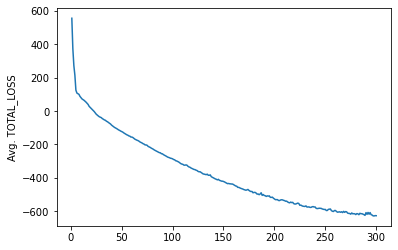

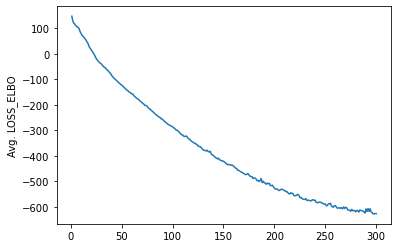

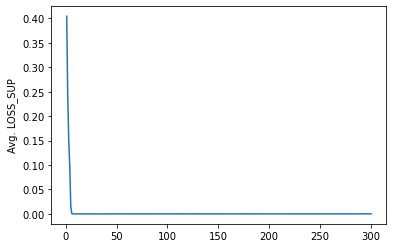

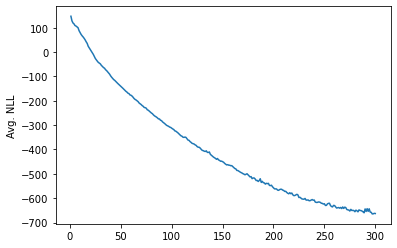

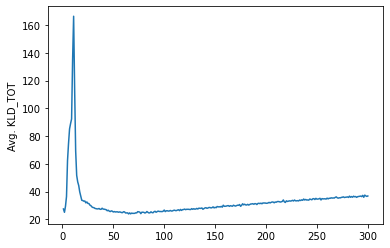

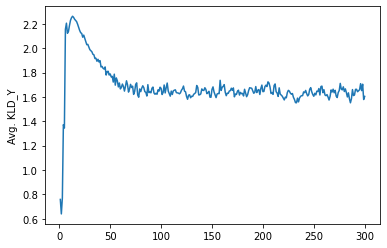

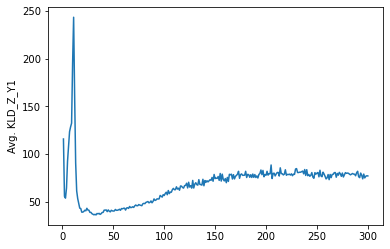

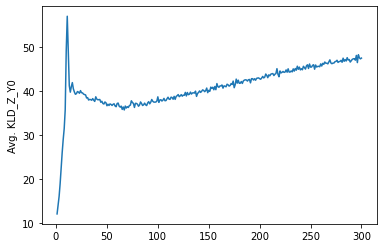

In [29]:
# Plots for losses
for col_name in df_train_metrics.columns:
    if "Avg. " in col_name:
        sns.lineplot(x=epochs_range,y=df_train_metrics[col_name])
        plt.show()

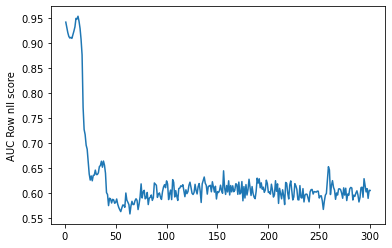

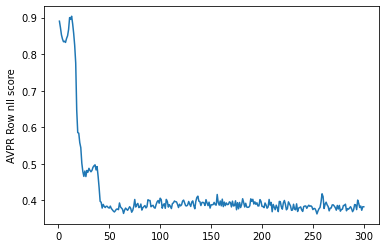

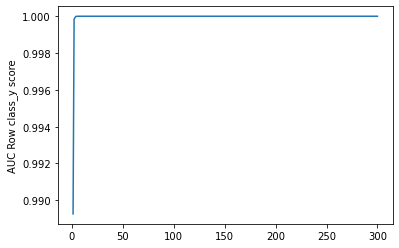

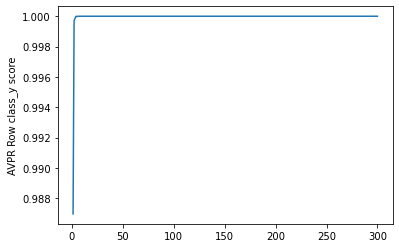

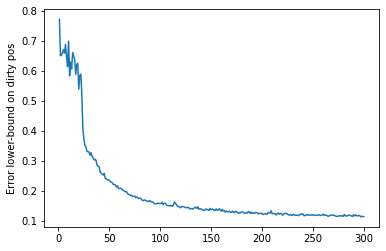

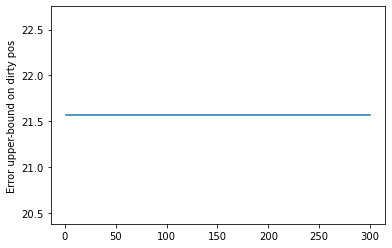

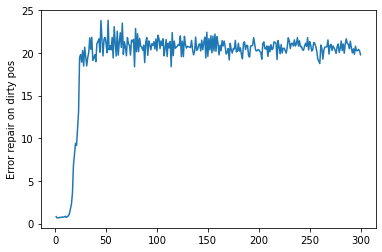

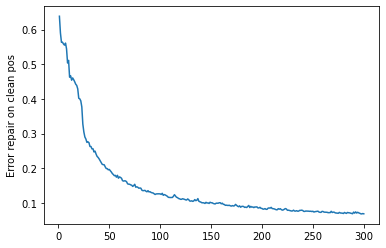

In [30]:
# Plots for classification and repair metrics
list_plot_custom = ["AUC Row nll score", "AVPR Row nll score", 
                    "AUC Row class_y score", "AVPR Row class_y score",
                    "Error lower-bound on dirty pos", "Error upper-bound on dirty pos",
                    "Error repair on dirty pos", "Error repair on clean pos"]

for col_name in list_plot_custom:
    sns.lineplot(x=epochs_range,y=df_train_metrics[col_name])
    plt.show()

## Plots Validation -- Losses

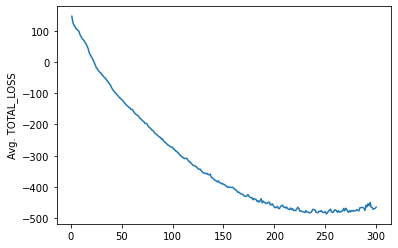

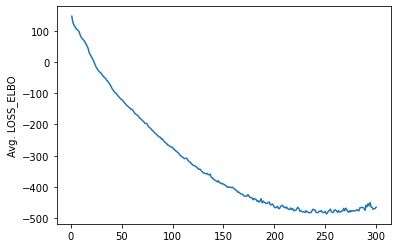

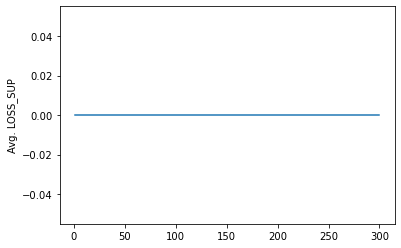

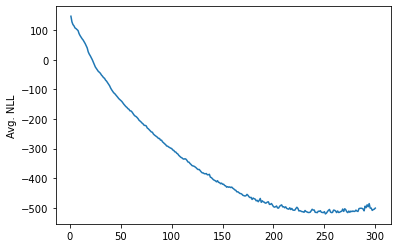

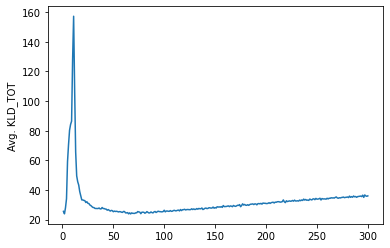

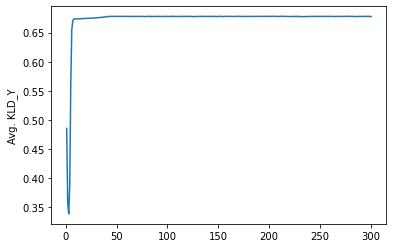

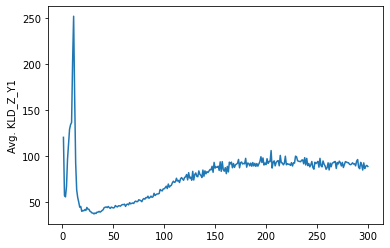

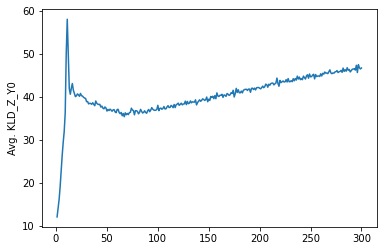

In [31]:
# Plots for losses
for col_name in df_valid_metrics.columns:
    if "Avg. " in col_name:
        sns.lineplot(x=epochs_range,y=df_valid_metrics[col_name])
        plt.show()

### Plot Test -- Losses

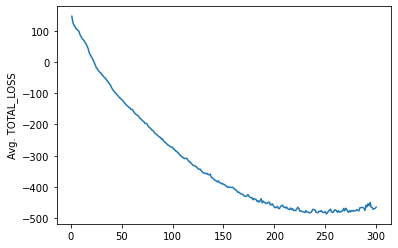

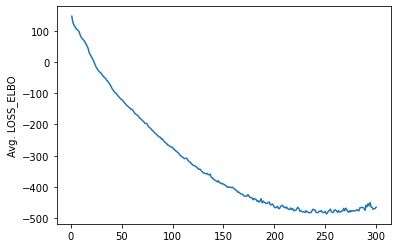

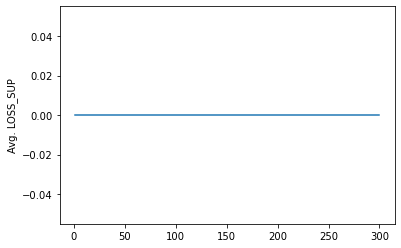

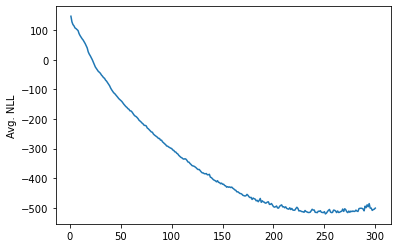

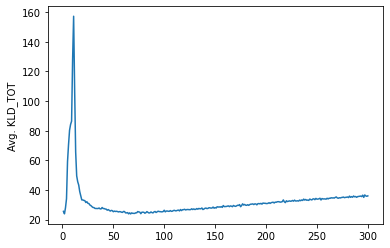

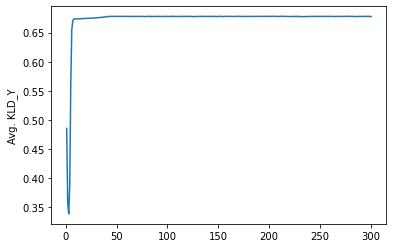

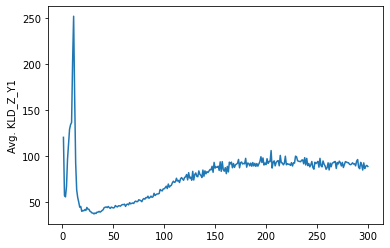

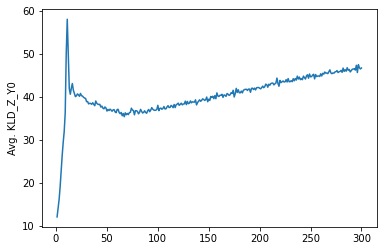

In [32]:
# Plots for losses
for col_name in df_test_metrics.columns:
    if "Avg. " in col_name:
        sns.lineplot(x=epochs_range,y=df_test_metrics[col_name])
        plt.show()

### Get Recons, Latent Space, etc

In [33]:
vae_p_params_xd, vae_q_params, vae_q_samples, _ = vae_mdl(X_train)
recons_train = vae_p_params_xd['recon']['x'].cpu().detach().numpy()
z_train_clean = vae_q_params['z']['mu'].detach().cpu().numpy() # is z_y1 (clean)
z_train_dirty = vae_q_params['z_y0']['mu'].detach().cpu().numpy() # is z_y0 (dirty)


In [34]:
# Plot mu's and covariance's

z_train_y1_mu = vae_q_params['z']['mu'].detach().cpu().numpy() # is z_y1 (clean)
z_train_y0_mu = vae_q_params['z_y0']['mu'].detach().cpu().numpy() # is z_y0 (dirty)

z_train_y1_var = np.exp(vae_q_params['z']['logvar'].detach().cpu().numpy()) # is z_y1 (clean)
z_train_y0_var = np.exp(vae_q_params['z_y0']['logvar'].detach().cpu().numpy()) # is z_y0 (dirty)

print("median of variances (per dim), clean: \n {} \n".format(np.median(z_train_y1_var, axis=0)))
print("median of variances (per dim), dirty: \n {} \n".format(np.median(z_train_y0_var, axis=0)))

print("median of means (per dim), clean: \n {} \n".format(np.median(z_train_y1_mu, axis=0)))
print("median of means (per dim), dirty: \n {} \n".format(np.median(z_train_y0_mu, axis=0)))

median of variances (per dim), clean: 
 [0.39394557 0.00228036 0.00119772 0.00263698 0.00192189 0.4347332
 0.00242321 0.00243976 0.0026113  0.3865093  0.00152661 0.39791253
 0.00342692 0.00085525 0.3699395 ] 

median of variances (per dim), dirty: 
 [0.41968375 0.002414   0.00126851 0.00277268 0.00204161 0.45786393
 0.00255306 0.00256816 0.00275066 0.40983355 0.00162997 0.42307025
 0.00360431 0.00091415 0.39211437] 

median of means (per dim), clean: 
 [ 1.2414403e-02 -2.9589260e-01 -6.2957928e-03  2.4579079e-01
  1.2647336e-02 -2.8799772e-03  5.3784456e-02  8.3779946e-02
  2.0485184e-01 -5.1361863e-03  3.5282549e-01 -1.4615841e-02
  1.4142759e-02  6.6784896e-02  3.4272671e-04] 

median of means (per dim), dirty: 
 [ 0.0088777  -0.33476257 -0.00579635  0.288911    0.03796189 -0.00138798
  0.073357    0.09364647  0.21554157 -0.00382237  0.37321842 -0.01351991
  0.02605107  0.07528474 -0.00280321] 



In [35]:
recon_imgs_train = recons_train.reshape(-1,28,20)*dataset_obj.cont_stds + dataset_obj.cont_means

### Show Clean Datapoints at Random

y_noise: 0


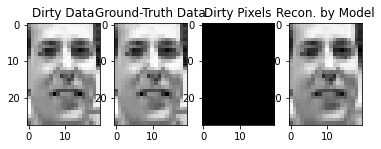

y_noise: 0


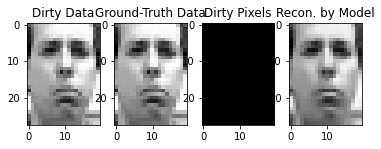

y_noise: 0


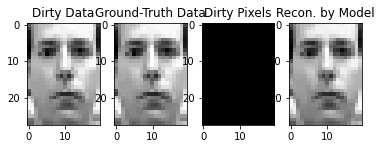

y_noise: 0


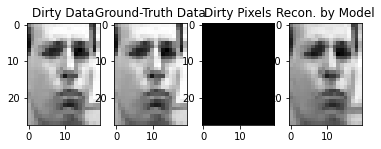

y_noise: 0


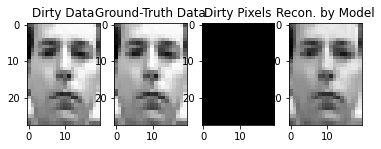

y_noise: 0


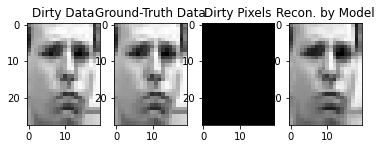

y_noise: 0


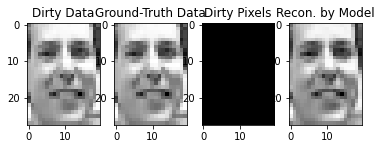

y_noise: 0


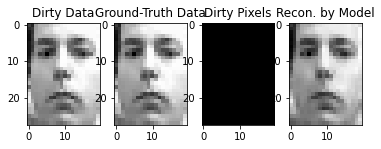

y_noise: 0


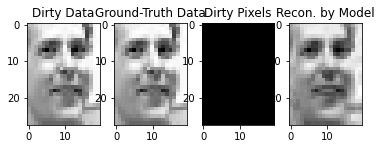

y_noise: 0


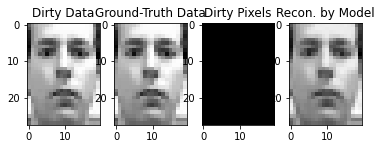

y_noise: 0


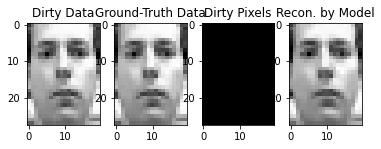

y_noise: 0


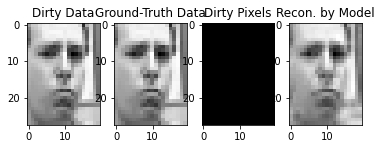

y_noise: 0


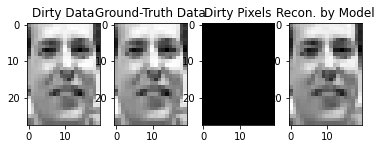

y_noise: 0


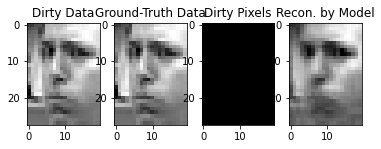

y_noise: 0


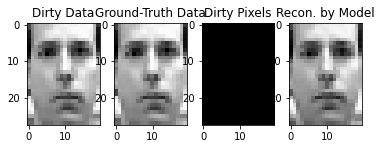

y_noise: 0


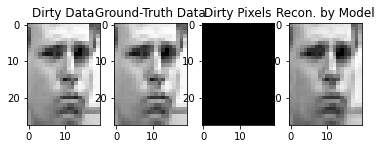

y_noise: 0


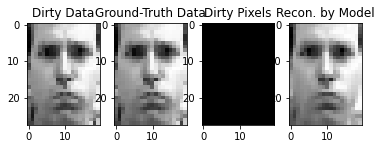

y_noise: 0


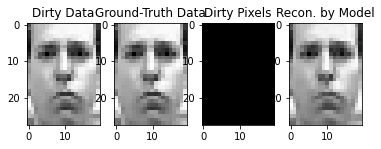

y_noise: 0


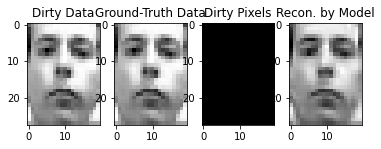

y_noise: 0


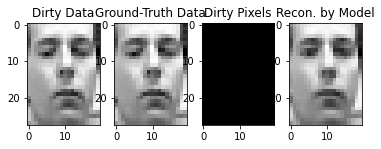

y_noise: 0


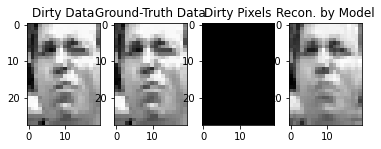

y_noise: 0


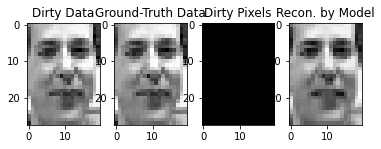

y_noise: 0


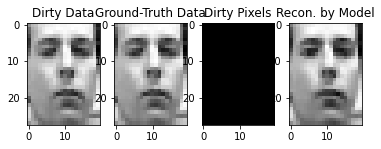

y_noise: 0


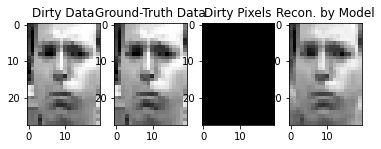

y_noise: 0


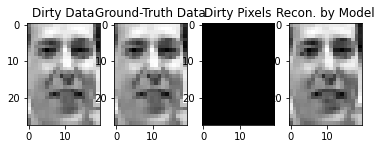

In [36]:
max_imgs_show = 25
y_noise_idxs_train = np.where(~y_noise_instance_train)[0]
some_idxs = np.random.permutation(y_noise_idxs_train)[:max_imgs_show]
# y_noise -- 1 if instance dirty; 0 if instance clean. (NOTE: inverted meaning in generative model)
    
for idx in some_idxs:
    print("y_noise: {}".format(int(y_noise_instance_train[idx])))
    fig, ax = plt.subplots(1,4)
    ax[0].imshow(x_train_orig[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[0].set_title("Dirty Data")
    ax[1].imshow(x_train_clean_orig[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[1].set_title("Ground-Truth Data")
    ax[2].imshow(y_noise_pixels_train[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[2].set_title("Dirty Pixels")
    #ax[3].imshow(recon_imgs_train[idx,...], cmap="gray",) #  vmin=0.0, vmax=1.0
    ax[3].imshow(recon_imgs_train[idx,...], cmap="gray",) #  vmin=0.0, vmax=1.0
    ax[3].set_title("Recon. by Model")
    plt.show()



### Show Dirty Datapoints at Random

y_noise: 1


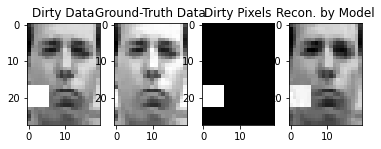

y_noise: 1


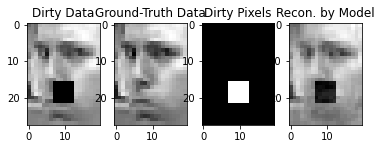

y_noise: 1


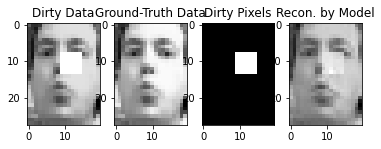

y_noise: 1


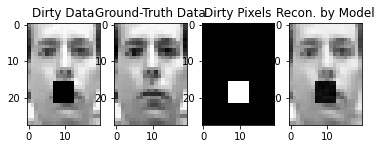

y_noise: 1


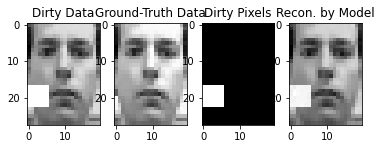

y_noise: 1


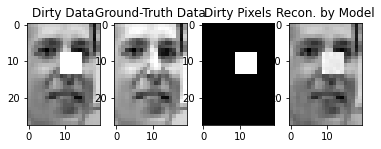

y_noise: 1


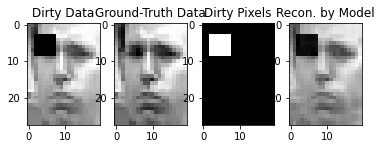

y_noise: 1


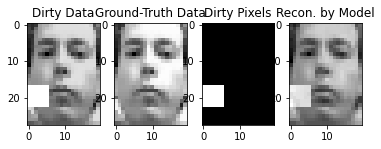

y_noise: 1


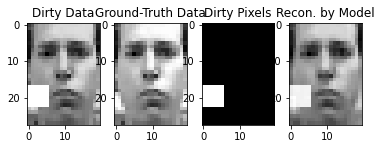

y_noise: 1


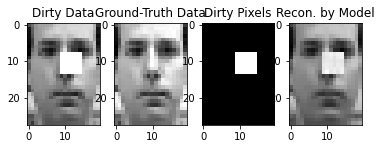

y_noise: 1


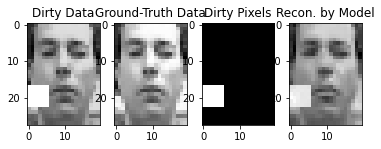

y_noise: 1


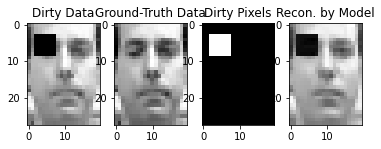

y_noise: 1


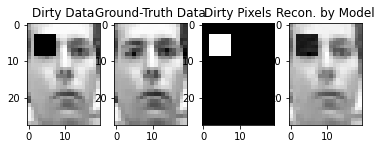

y_noise: 1


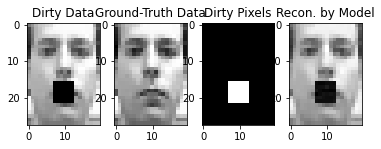

y_noise: 1


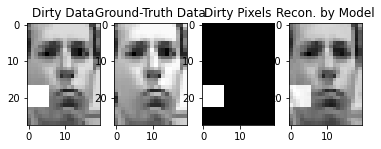

y_noise: 1


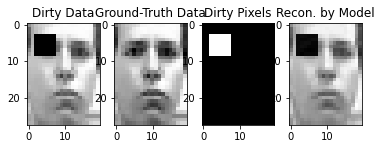

y_noise: 1


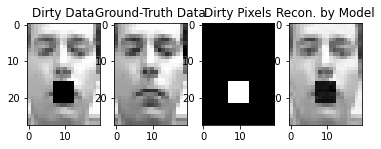

y_noise: 1


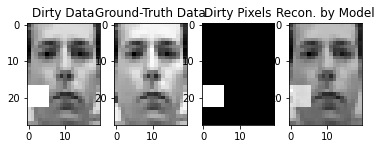

y_noise: 1


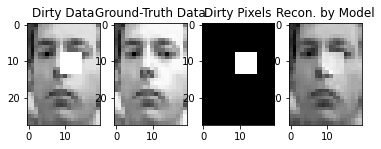

y_noise: 1


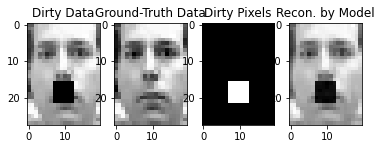

y_noise: 1


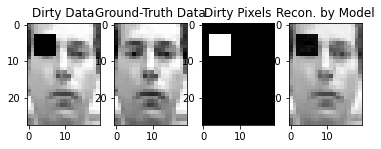

y_noise: 1


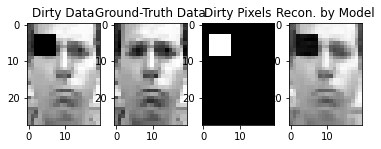

y_noise: 1


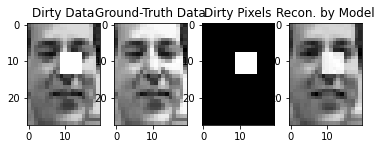

y_noise: 1


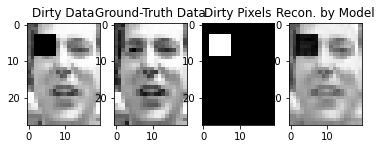

y_noise: 1


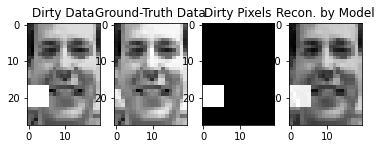

In [37]:
max_imgs_show = 25
y_noise_idxs_train = np.where(y_noise_instance_train)[0]
some_idxs = np.random.permutation(y_noise_idxs_train)[:max_imgs_show]
# y_noise -- 1 if instance dirty; 0 if instance clean. (NOTE: inverted meaning in generative model)
    
for idx in some_idxs:
    print("y_noise: {}".format(int(y_noise_instance_train[idx])))
    fig, ax = plt.subplots(1,4)
    ax[0].imshow(x_train_orig[idx,...], cmap="gray", ) # vmin=0.0, vmax=1.0
    ax[0].set_title("Dirty Data")
    ax[1].imshow(x_train_clean_orig[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[1].set_title("Ground-Truth Data")
    ax[2].imshow(y_noise_pixels_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[2].set_title("Dirty Pixels")
    ax[3].imshow(recon_imgs_train[idx,...], cmap="gray",) #  vmin=0.0, vmax=1.0
    #ax[3].imshow(recon_imgs_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[3].set_title("Recon. by Model")
    plt.show()



### Show per noise type images: y_noise_lists or y_noise_dict

Noise Tag: 0
Noise Indices: 
[932, 474, 203, 1513, 1003, 1530, 303, 546, 1071, 760, 429, 1418, 1083, 287, 1348, 1140, 330, 1386, 885, 331, 895, 33, 705, 698, 558, 1427, 843, 1193, 746, 867, 1500, 671, 1415, 1130, 1304, 129, 937, 1118, 1372, 422, 523, 261, 1397, 1152, 953, 1349, 271, 872, 928, 779, 173, 1166, 21, 454, 399, 1391, 894, 797, 561, 1145, 1081, 1195, 554, 1554, 1208, 1317, 253, 6, 670, 1390, 456, 1550, 1061, 1436, 1199, 1232, 1562, 1339, 1393, 681, 1213, 248, 1244, 424, 92, 350, 1485, 919, 1279, 225, 644, 552, 179, 1464, 355, 403, 25, 88, 1478, 852, 854, 1139, 909, 1503, 148, 348, 1157, 300, 1340, 688, 916, 436, 1337, 112, 956, 347, 724, 265, 356, 1137, 817, 619, 929, 962, 368, 335, 1205, 259, 1553, 689]
y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


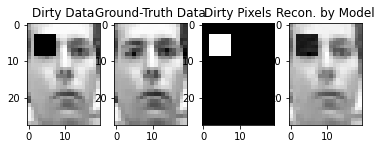

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


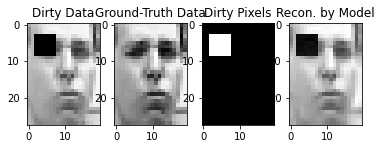

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


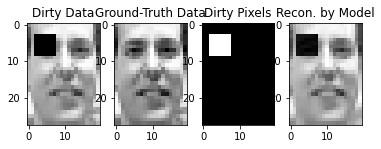

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


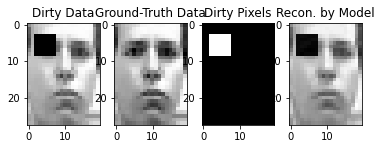

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


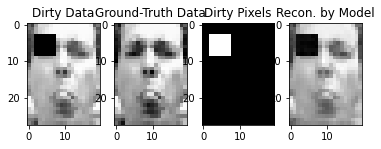

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


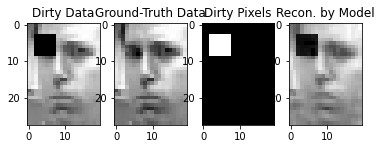

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


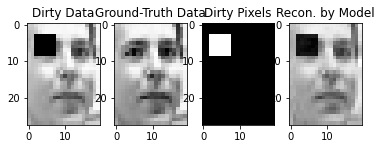

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


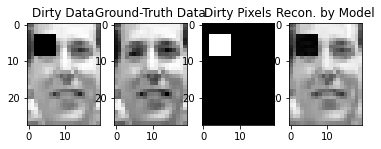

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


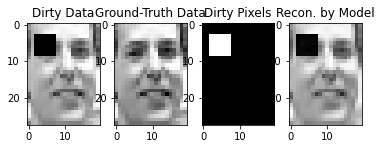

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 0


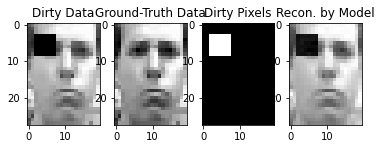







Noise Tag: 1
Noise Indices: 
[930, 1476, 650, 161, 45, 2, 1198, 1434, 616, 614, 150, 651, 162, 661, 1063, 100, 631, 1050, 328, 1128, 798, 1057, 1033, 1255, 384, 604, 756, 487, 816, 612, 1188, 493, 1214, 1223, 44, 1456, 636, 205, 164, 998, 1510, 295, 157, 773, 765, 1571, 8, 1266, 1173, 1442, 755, 1009, 1315, 1481, 396, 1286, 726, 1067, 1225, 250, 1566, 362, 800, 559, 1408, 483, 435, 841, 431, 70, 82, 514, 444, 34, 738, 234, 1169, 1074, 332, 570, 1020, 1264, 1399, 673, 1471, 1480, 397, 1298, 1398, 393, 1068, 499, 383, 116, 195, 196, 562, 281, 90, 1141, 1345, 285, 1184, 1191, 1330, 511, 305, 55, 1370, 473, 1552, 238, 278, 969, 1238, 1175, 732, 439, 402, 1319, 1308, 740, 188, 898, 596, 1116, 1343, 741, 1289, 211, 1196, 140, 1551, 1302, 1248, 1375, 730, 1052, 1377, 923, 1565, 1189, 1010, 450]
y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


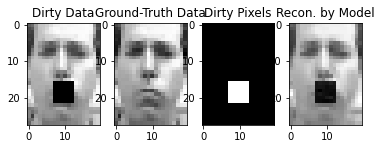

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


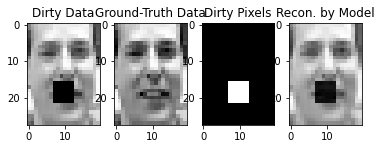

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


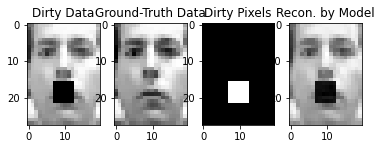

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


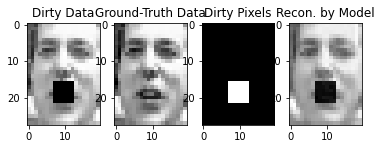

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


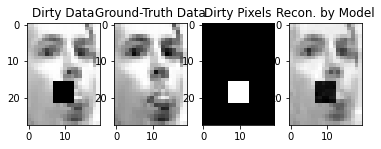

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


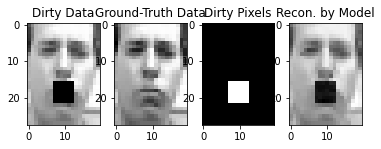

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


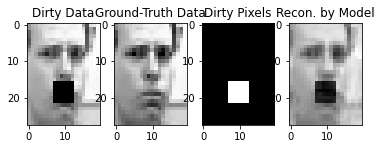

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


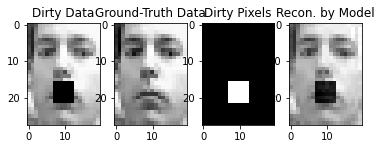

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


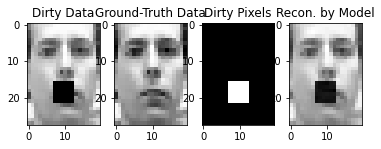

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 1


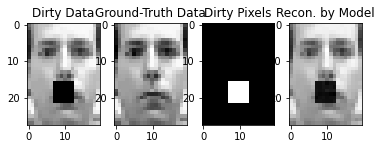







Noise Tag: 2
Noise Indices: 
[1004, 1093, 491, 252, 711, 1075, 1463, 68, 1369, 433, 158, 997, 375, 412, 1455, 1428, 597, 340, 7, 336, 538, 543, 390, 657, 500, 1371, 1096, 322, 957, 154, 10, 993, 13, 128, 497, 1546, 1406, 821, 121, 1262, 130, 1056, 676, 757, 634, 1328, 678, 1097, 1534, 708, 955, 795, 679, 943, 310, 587, 1525, 381, 859, 1219, 653, 857, 220, 57, 981, 451, 982, 845, 254, 411, 806, 582, 1030, 477, 1127, 298, 169, 42, 1462, 563, 1441, 547, 1103, 588, 663, 1294, 739, 759, 1338, 864, 703, 1438, 1320, 959, 617, 366, 938, 279, 1265, 1517, 319, 526, 1099, 96, 1007, 702, 472, 530, 1186, 230, 1104, 989, 822, 1569, 949, 1240, 1332, 975, 579, 1107, 1488, 1060, 1037, 625, 1494, 327, 1153, 379, 1300, 788, 176, 1344, 1496, 1042, 1439]
y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


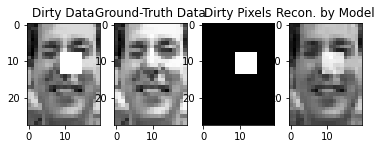

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


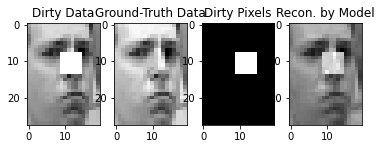

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


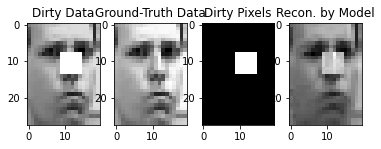

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


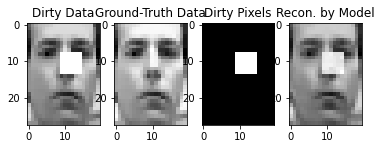

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


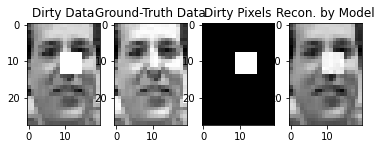

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


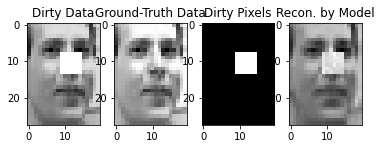

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


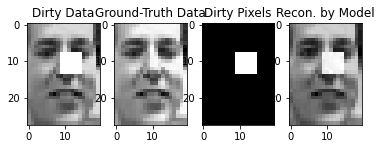

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


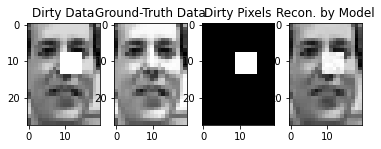

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


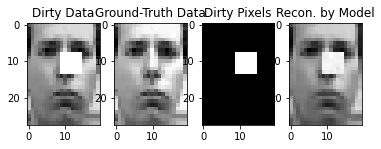

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 2


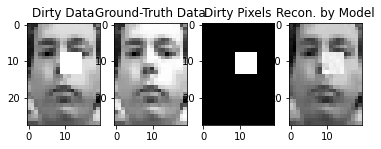







Noise Tag: 3
Noise Indices: 
[1079, 577, 476, 359, 312, 155, 1234, 388, 805, 231, 1498, 723, 1110, 1489, 633, 457, 308, 507, 1411, 697, 1365, 496, 1564, 1258, 525, 1101, 1172, 920, 181, 510, 1149, 1284, 27, 1417, 555, 1158, 413, 1201, 486, 802, 1549, 1402, 731, 1283, 437, 52, 245, 1251, 1453, 1531, 1380, 72, 753, 1495, 865, 288, 1492, 823, 660, 694, 1334, 1105, 1041, 210, 223, 520, 882, 110, 200, 1394, 1029, 835, 339, 301, 373, 296, 466, 1220, 1429, 1049, 1027, 1069, 1087, 896, 349, 1292, 907, 395, 1025, 1364, 1314, 830, 1414, 275, 601, 542, 191, 11, 1506, 446, 967, 360, 1072, 3, 40, 785, 808, 1450, 1121, 1293, 463, 610, 434, 803, 539, 479, 316, 1170, 1167, 1341, 700, 970, 1085, 971, 573]
y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


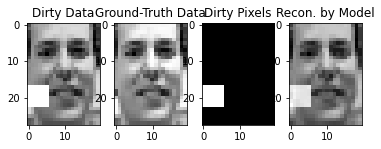

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


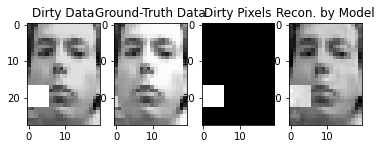

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


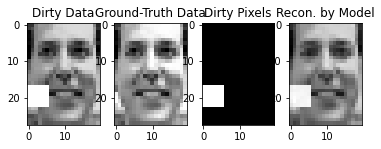

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


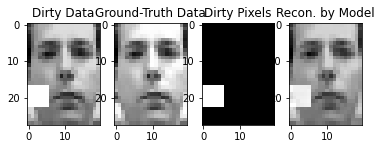

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


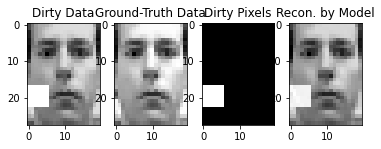

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


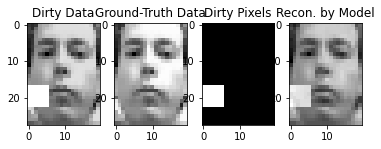

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


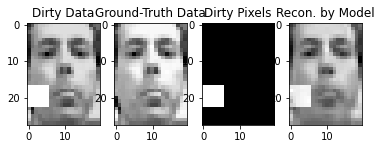

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


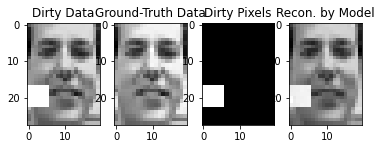

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


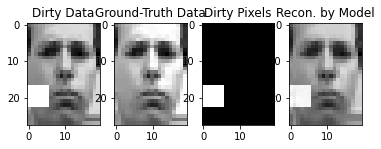

y_class (clean): 0 | y_noise: True | y_noise_tag (noise type): 3


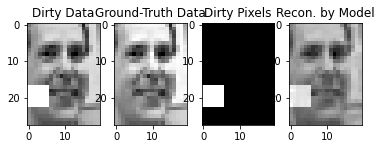

In [38]:
## show per noise type images: y_noise_lists or y_noise_dict

max_show_n = 10

for noise_key, noise_idxs in y_noise_dict_train.items():
    
    print("Noise Tag: {}".format(noise_key))
    print("Noise Indices: \n{}".format(noise_idxs))
    
    _selected_idxs = np.random.permutation(noise_idxs)[:max_show_n]
    
    for idx in _selected_idxs:
    
        print("y_class (clean): {} | y_noise: {} | y_noise_tag (noise type): {}".format(
            0, y_noise_instance_train[idx], noise_key)) # y_class_train[idx]
        fig, ax = plt.subplots(1,4)
        ax[0].imshow(x_train_orig[idx,...],cmap="gray")
        ax[0].set_title("Dirty Data")
        ax[1].imshow(x_train_clean_orig[idx,...],cmap="gray")
        ax[1].set_title("Ground-Truth Data")
        ax[2].imshow(y_noise_pixels_train[idx,...],cmap="gray")
        ax[2].set_title("Dirty Pixels")
        #ax[3].imshow(recon_imgs_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
        ax[3].imshow(recon_imgs_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
        ax[3].set_title("Recon. by Model")
        plt.show()
        
    print("\n\n\n\n\n")


### Show Trusted Set (Clean Ground-Truth, Train Data, Recon)

In [39]:
len(trusted_idxs_train)

250

y_noise: 0


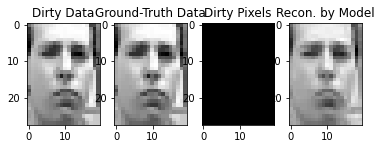

y_noise: 0


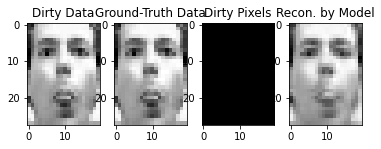

y_noise: 0


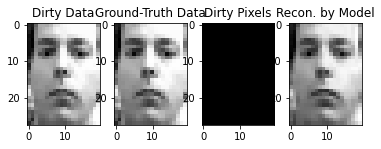

y_noise: 0


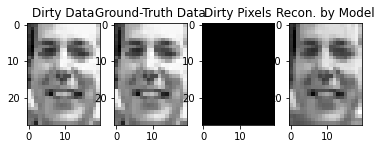

y_noise: 0


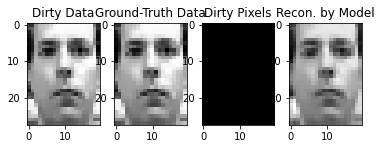

y_noise: 0


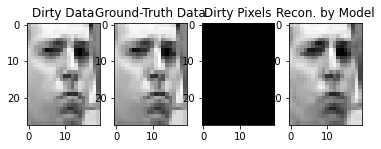

y_noise: 0


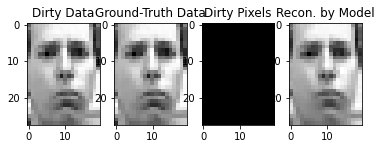

y_noise: 0


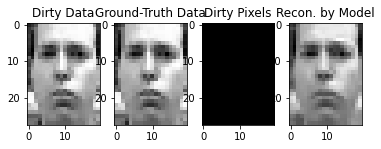

y_noise: 0


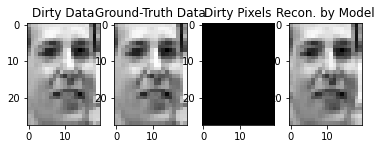

y_noise: 0


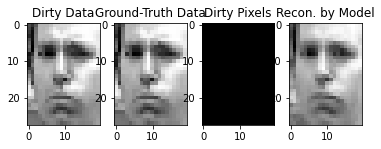

y_noise: 0


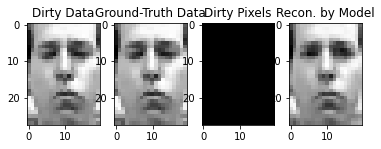

y_noise: 0


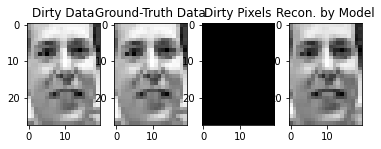

y_noise: 0


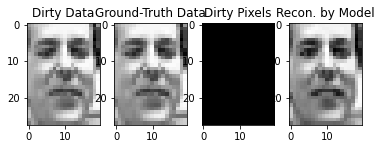

y_noise: 0


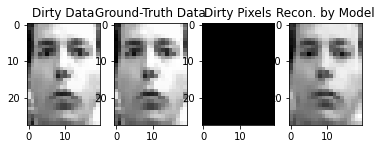

y_noise: 0


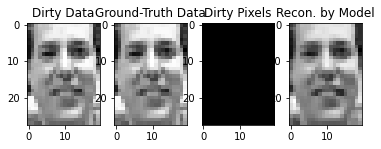

y_noise: 0


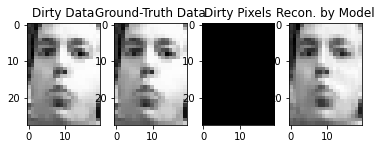

y_noise: 0


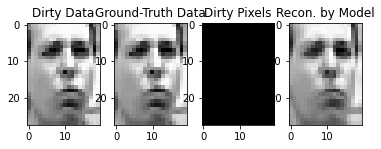

y_noise: 0


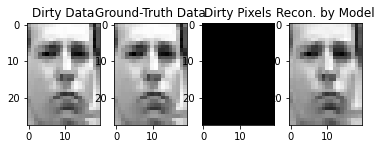

y_noise: 0


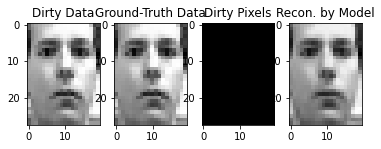

y_noise: 0


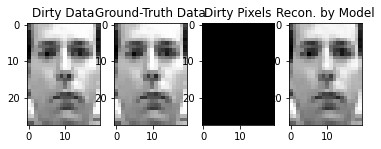

y_noise: 0


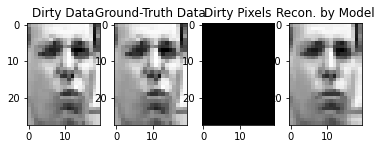

y_noise: 0


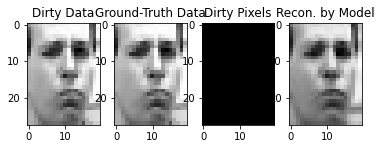

y_noise: 0


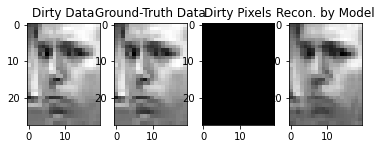

y_noise: 0


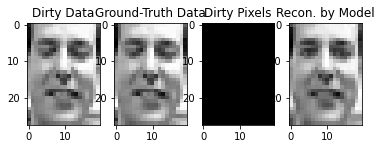

y_noise: 0


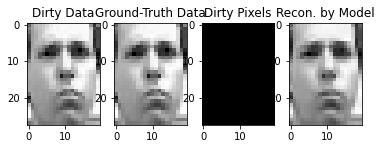

y_noise: 0


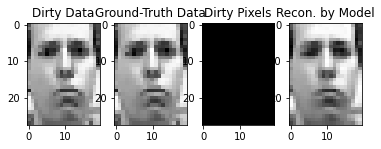

y_noise: 0


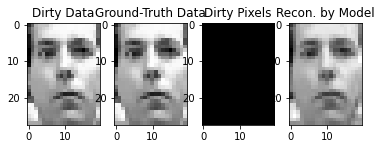

y_noise: 0


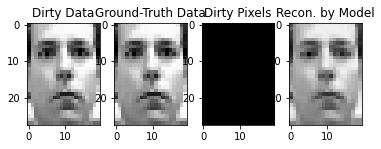

y_noise: 0


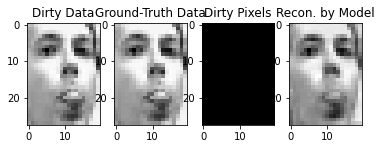

y_noise: 0


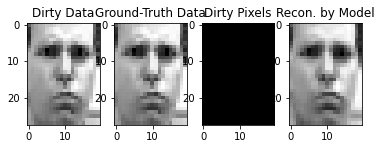

y_noise: 0


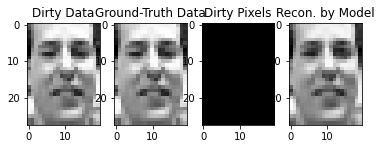

y_noise: 0


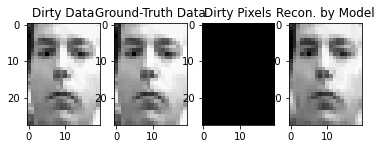

y_noise: 0


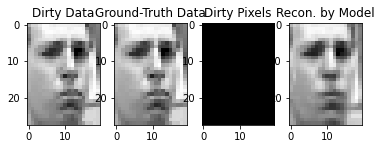

y_noise: 0


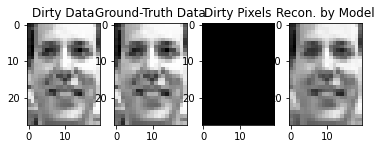

y_noise: 0


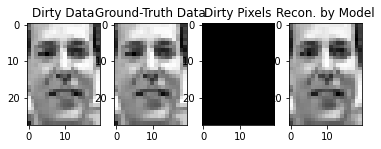

y_noise: 0


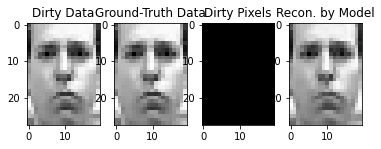

y_noise: 0


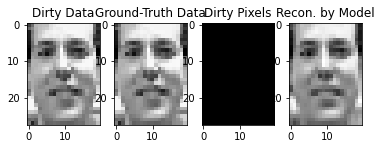

y_noise: 0


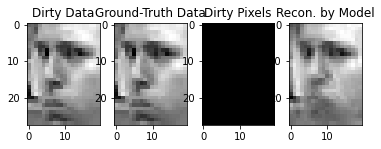

y_noise: 0


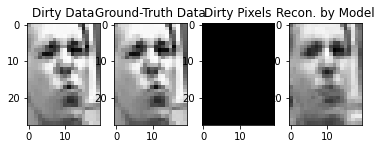

y_noise: 0


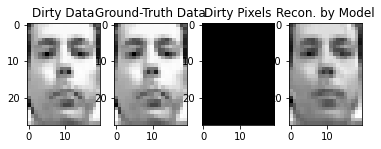

y_noise: 0


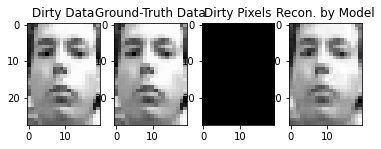

y_noise: 0


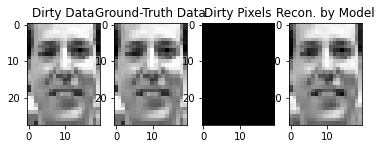

y_noise: 0


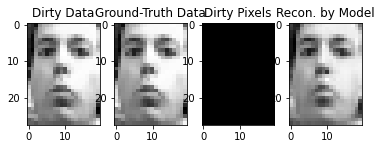

y_noise: 0


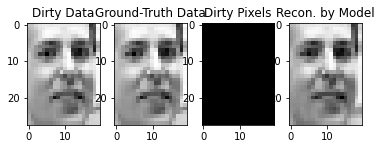

y_noise: 0


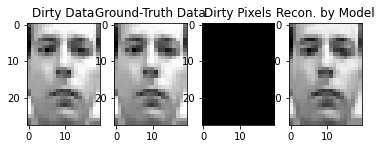

y_noise: 0


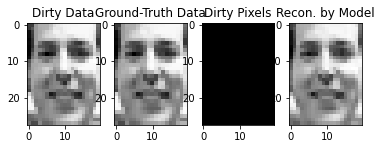

y_noise: 0


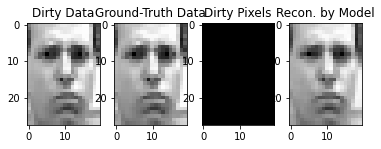

y_noise: 0


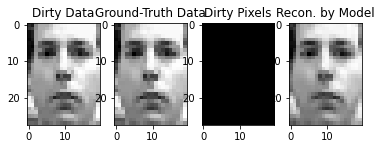

y_noise: 0


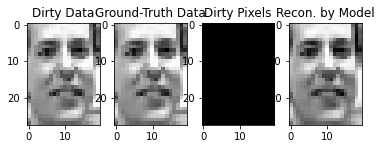

y_noise: 0


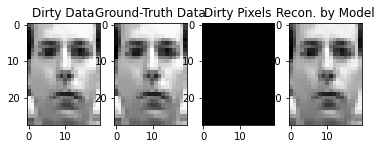

y_noise: 1


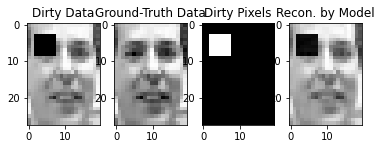

y_noise: 1


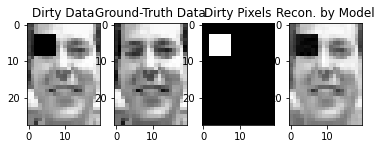

y_noise: 1


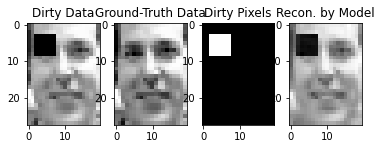

y_noise: 1


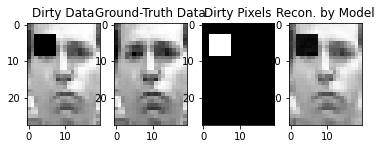

y_noise: 1


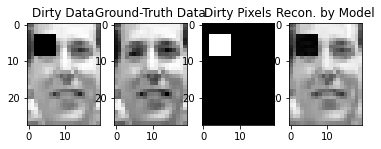

y_noise: 1


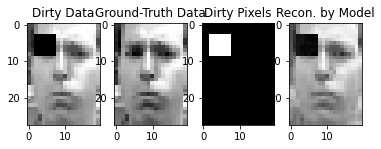

y_noise: 1


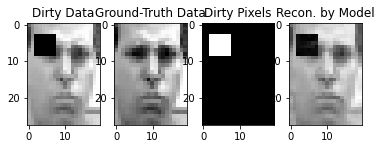

y_noise: 1


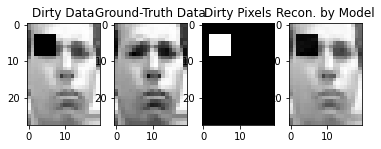

y_noise: 1


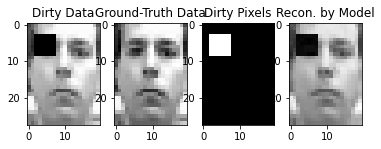

y_noise: 1


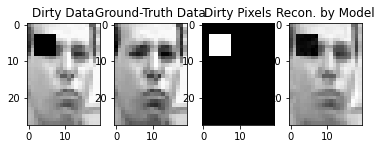

y_noise: 1


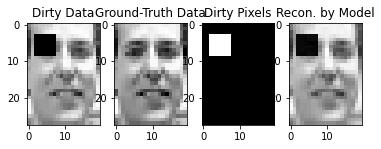

y_noise: 1


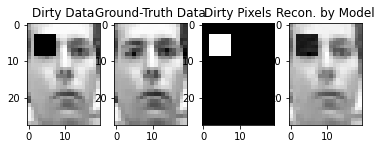

y_noise: 1


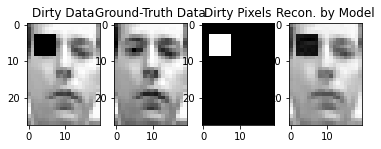

y_noise: 1


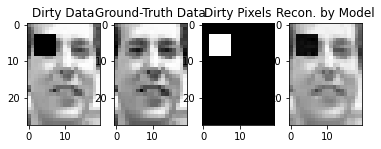

y_noise: 1


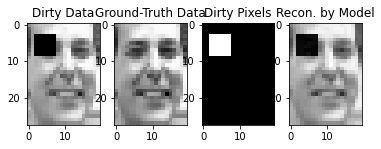

y_noise: 1


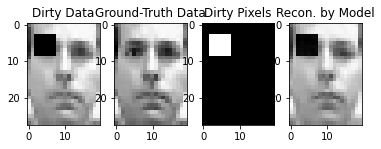

y_noise: 1


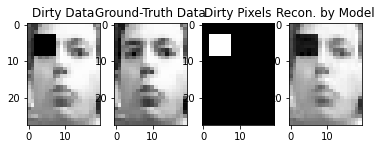

y_noise: 1


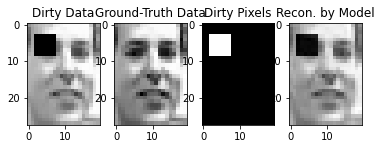

y_noise: 1


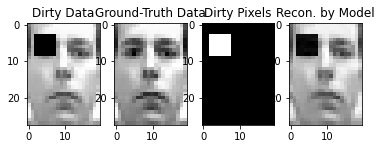

y_noise: 1


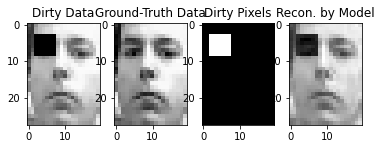

y_noise: 1


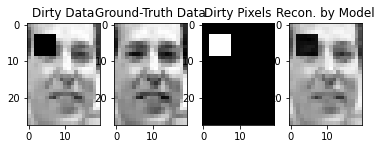

y_noise: 1


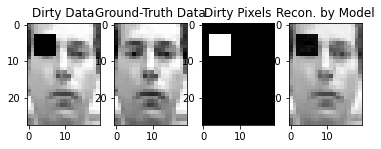

y_noise: 1


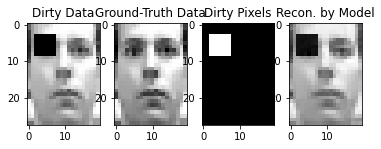

y_noise: 1


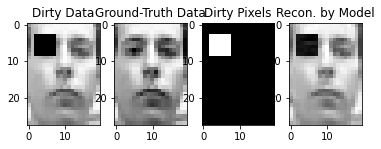

y_noise: 1


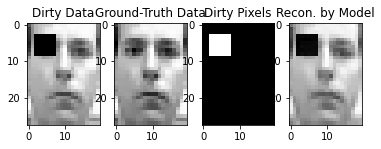

y_noise: 1


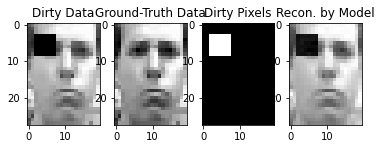

y_noise: 1


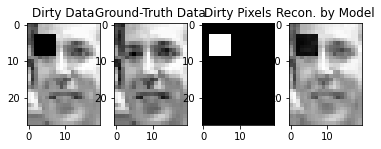

y_noise: 1


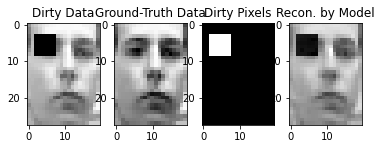

y_noise: 1


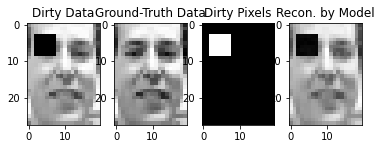

y_noise: 1


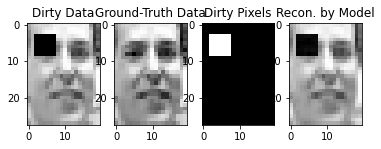

y_noise: 1


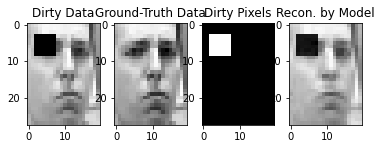

y_noise: 1


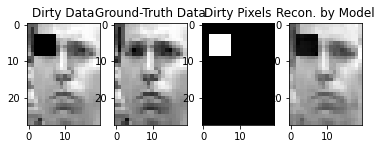

y_noise: 1


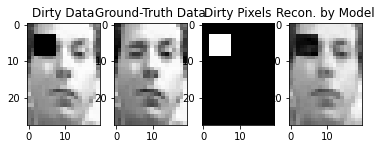

y_noise: 1


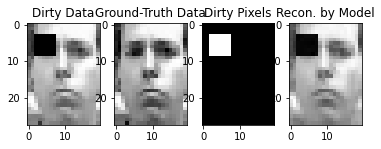

y_noise: 1


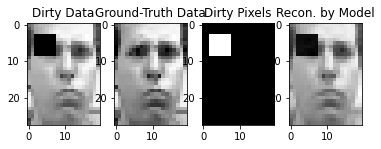

y_noise: 1


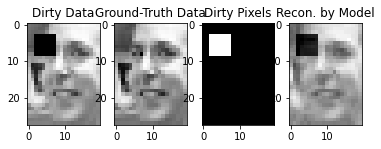

y_noise: 1


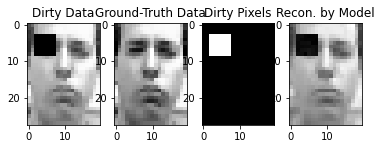

y_noise: 1


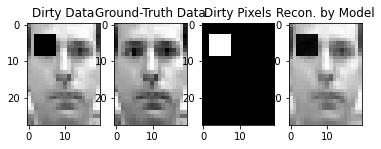

y_noise: 1


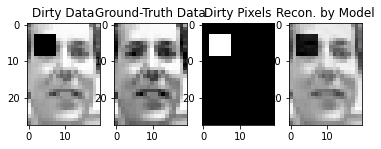

y_noise: 1


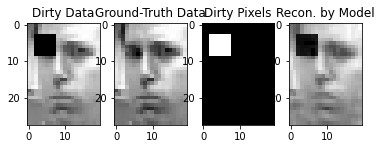

y_noise: 1


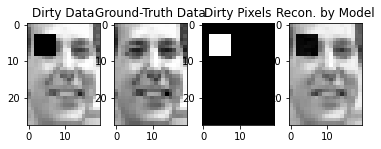

y_noise: 1


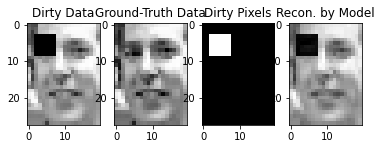

y_noise: 1


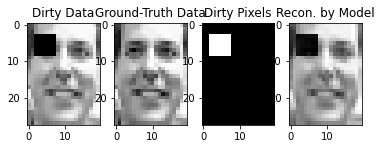

y_noise: 1


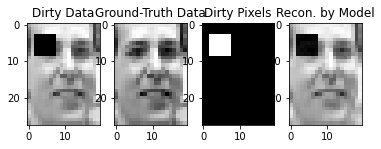

y_noise: 1


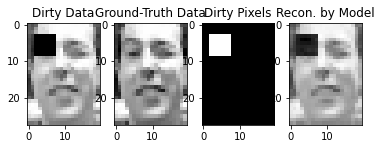

y_noise: 1


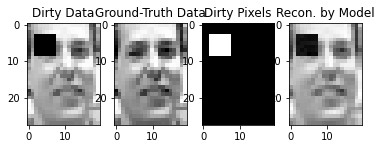

y_noise: 1


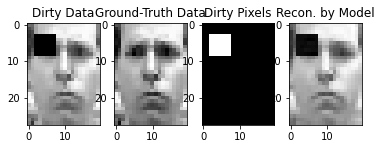

y_noise: 1


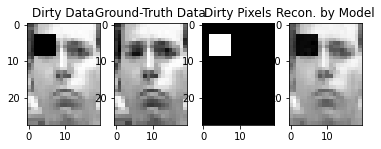

y_noise: 1


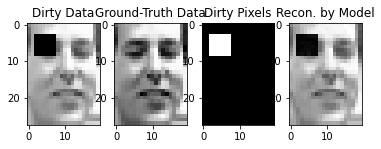

y_noise: 1


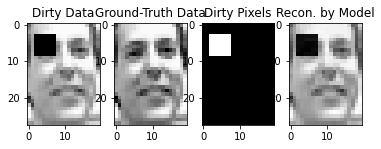

y_noise: 1


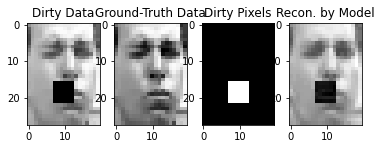

y_noise: 1


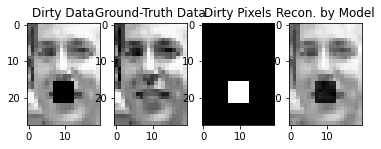

y_noise: 1


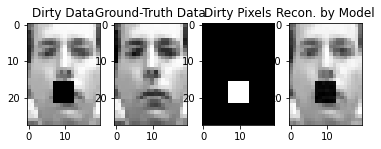

y_noise: 1


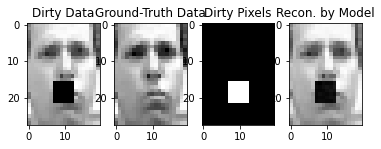

y_noise: 1


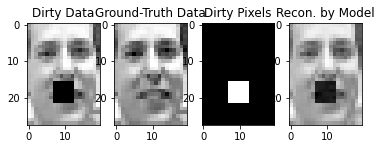

y_noise: 1


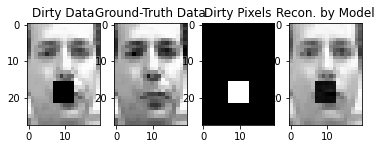

y_noise: 1


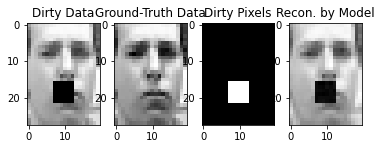

y_noise: 1


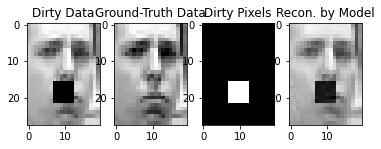

y_noise: 1


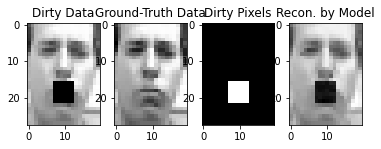

y_noise: 1


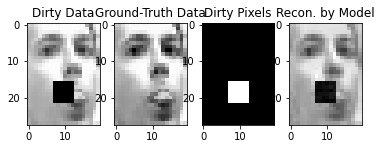

y_noise: 1


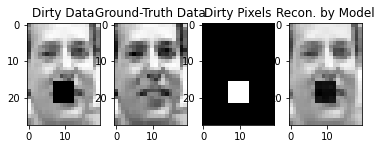

y_noise: 1


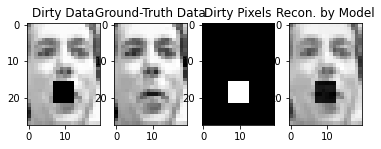

y_noise: 1


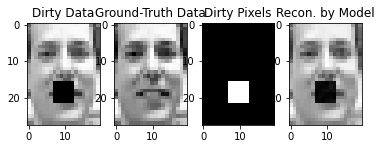

y_noise: 1


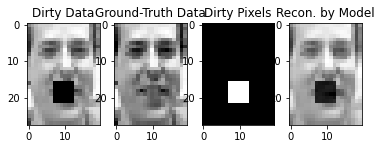

y_noise: 1


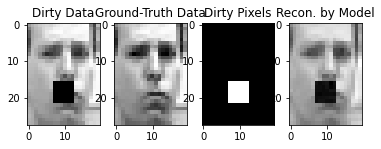

y_noise: 1


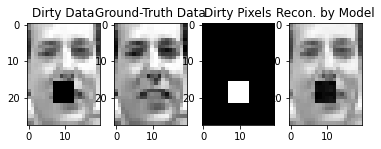

y_noise: 1


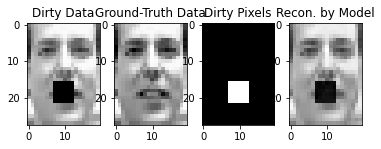

y_noise: 1


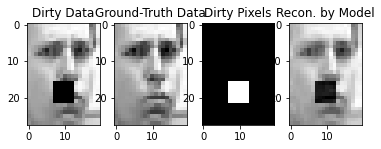

y_noise: 1


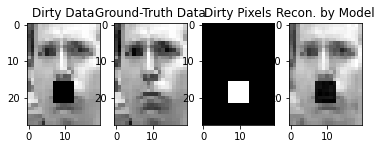

y_noise: 1


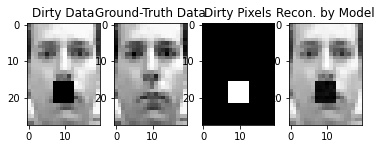

y_noise: 1


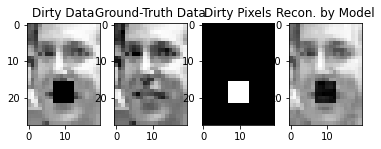

y_noise: 1


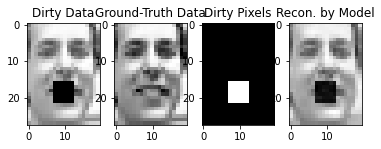

y_noise: 1


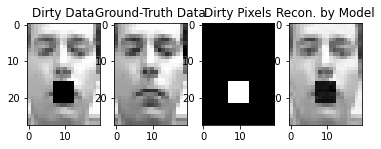

y_noise: 1


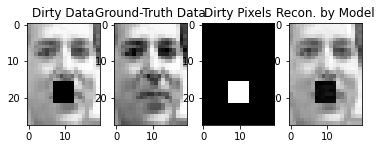

y_noise: 1


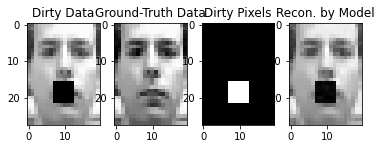

y_noise: 1


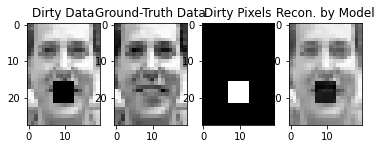

y_noise: 1


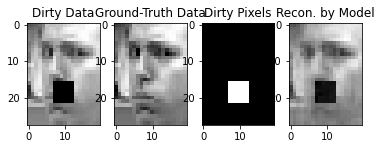

y_noise: 1


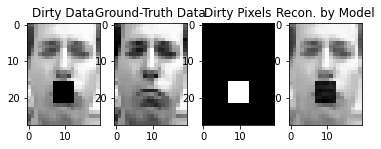

y_noise: 1


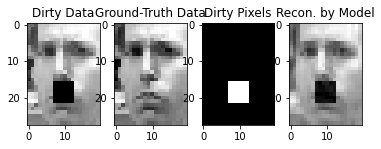

y_noise: 1


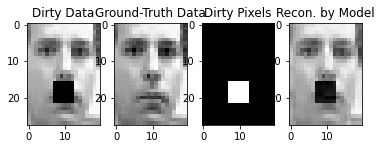

y_noise: 1


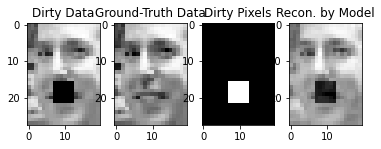

y_noise: 1


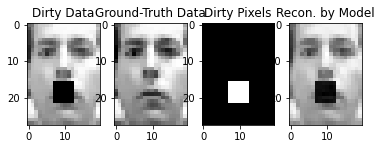

y_noise: 1


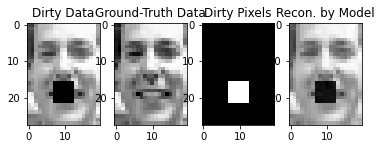

y_noise: 1


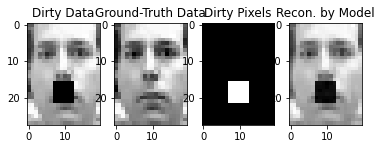

y_noise: 1


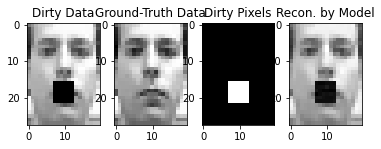

y_noise: 1


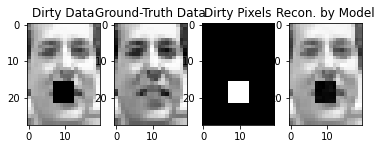

y_noise: 1


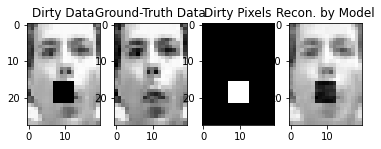

y_noise: 1


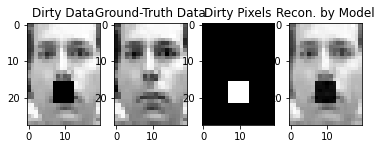

y_noise: 1


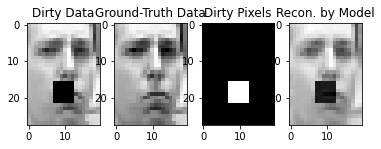

y_noise: 1


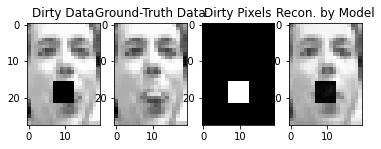

y_noise: 1


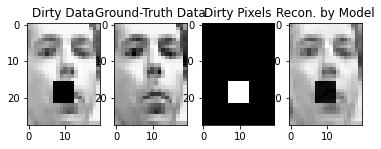

y_noise: 1


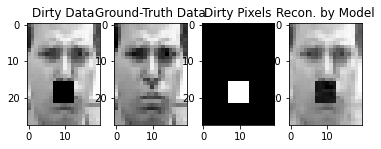

y_noise: 1


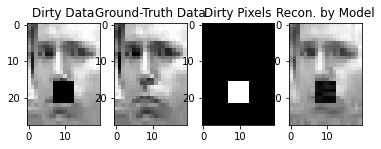

y_noise: 1


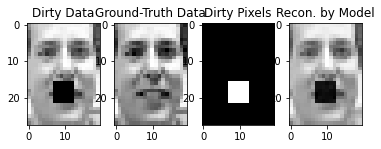

y_noise: 1


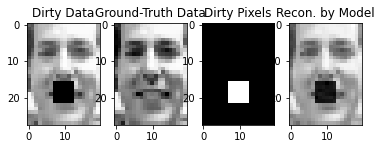

y_noise: 1


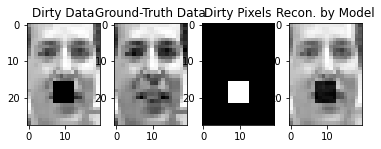

y_noise: 1


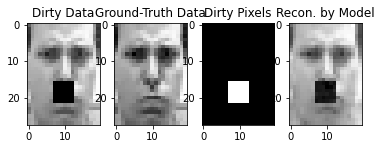

y_noise: 1


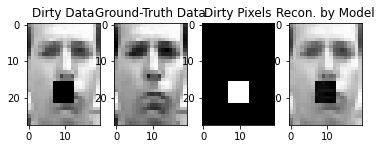

y_noise: 1


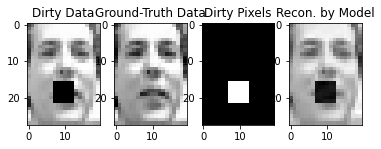

y_noise: 1


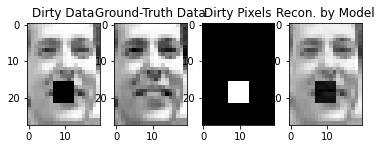

y_noise: 1


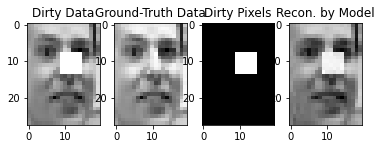

y_noise: 1


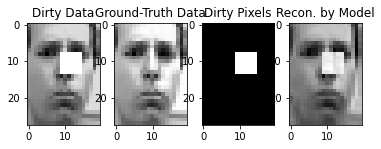

y_noise: 1


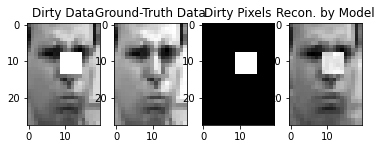

y_noise: 1


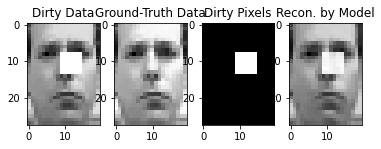

y_noise: 1


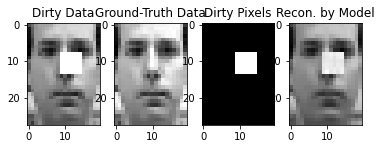

y_noise: 1


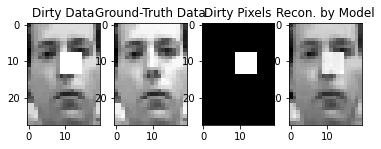

y_noise: 1


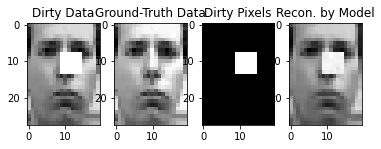

y_noise: 1


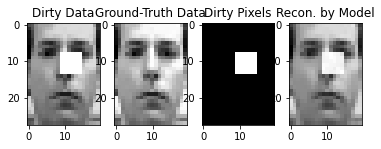

y_noise: 1


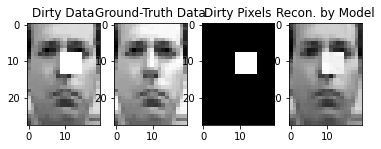

y_noise: 1


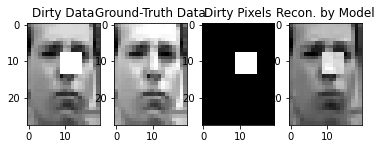

y_noise: 1


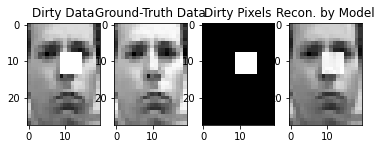

y_noise: 1


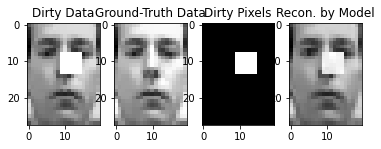

y_noise: 1


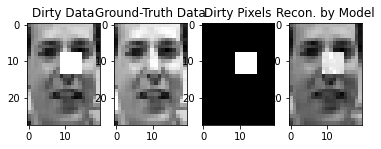

y_noise: 1


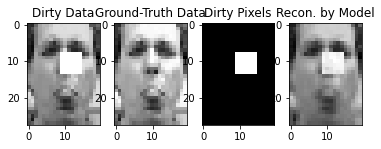

y_noise: 1


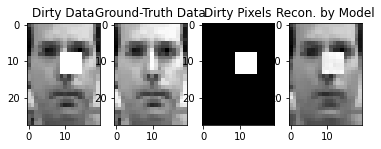

y_noise: 1


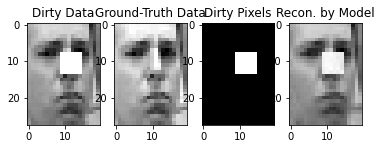

y_noise: 1


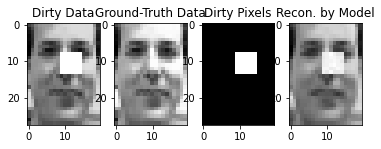

y_noise: 1


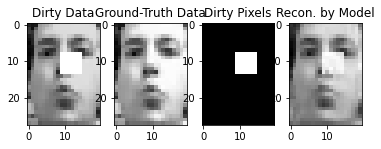

y_noise: 1


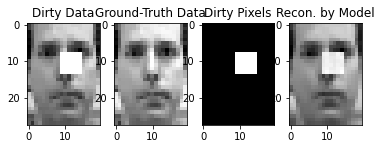

y_noise: 1


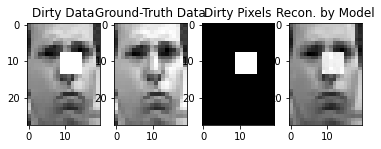

y_noise: 1


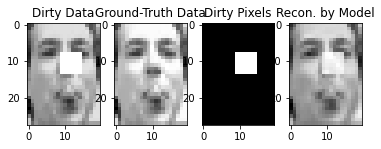

y_noise: 1


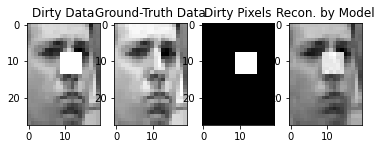

y_noise: 1


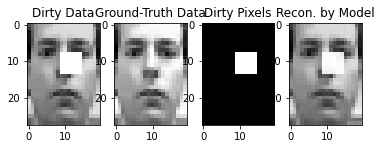

y_noise: 1


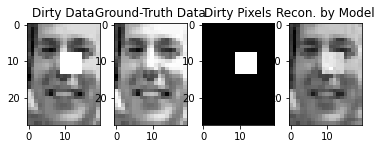

y_noise: 1


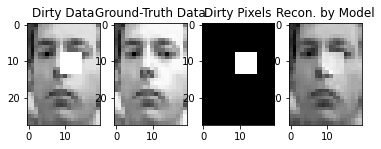

y_noise: 1


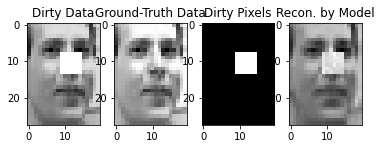

y_noise: 1


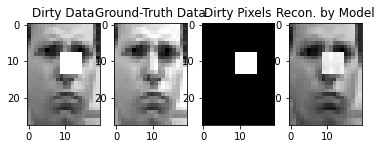

y_noise: 1


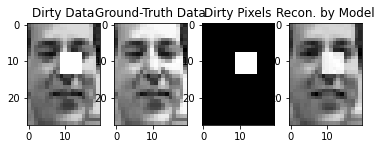

y_noise: 1


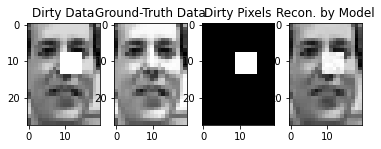

y_noise: 1


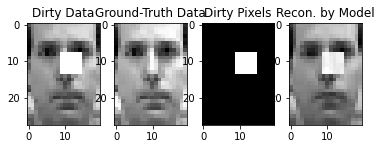

y_noise: 1


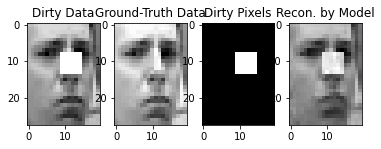

y_noise: 1


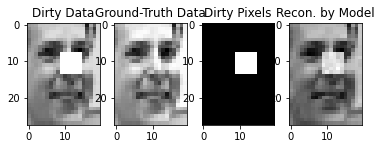

y_noise: 1


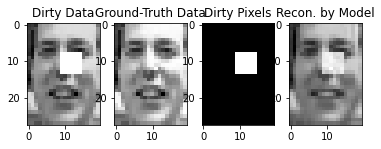

y_noise: 1


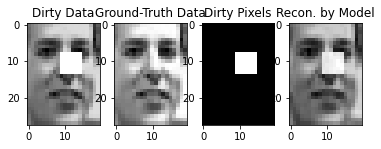

y_noise: 1


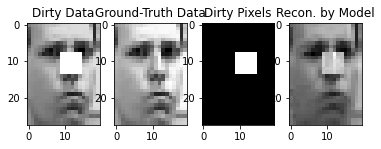

y_noise: 1


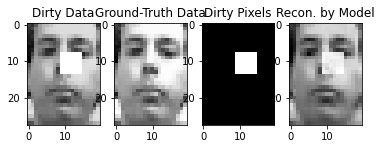

y_noise: 1


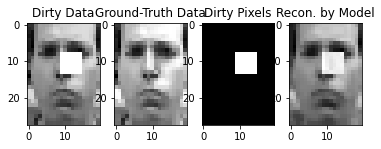

y_noise: 1


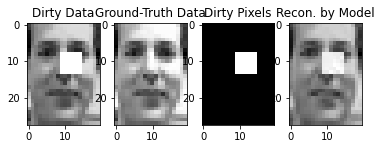

y_noise: 1


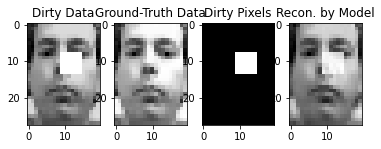

y_noise: 1


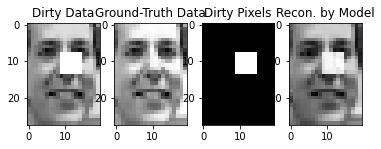

y_noise: 1


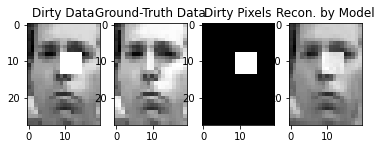

y_noise: 1


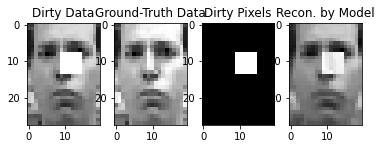

y_noise: 1


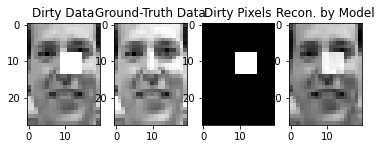

y_noise: 1


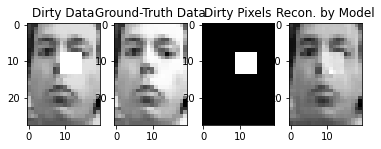

y_noise: 1


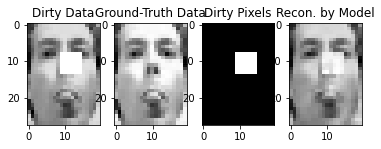

y_noise: 1


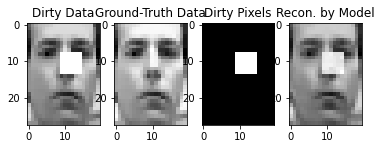

y_noise: 1


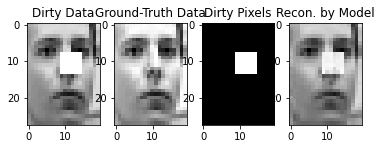

y_noise: 1


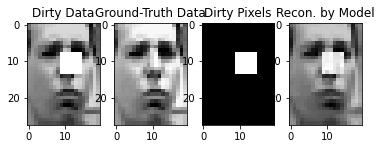

y_noise: 1


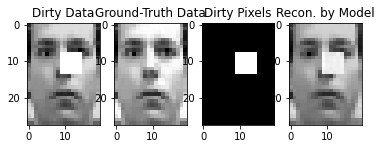

y_noise: 1


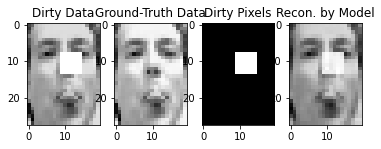

y_noise: 1


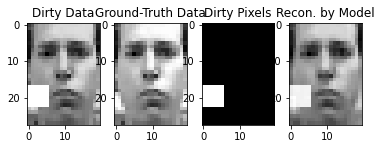

y_noise: 1


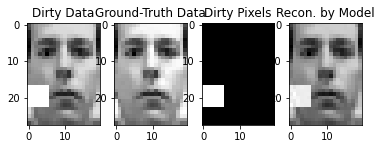

y_noise: 1


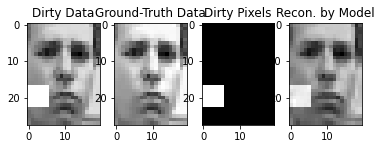

y_noise: 1


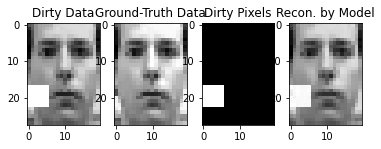

y_noise: 1


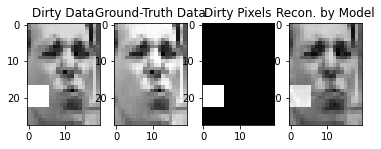

y_noise: 1


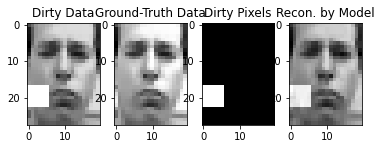

y_noise: 1


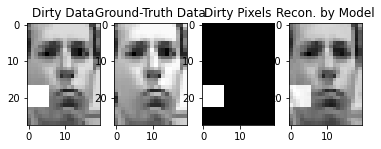

y_noise: 1


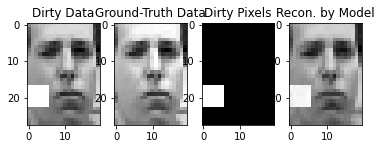

y_noise: 1


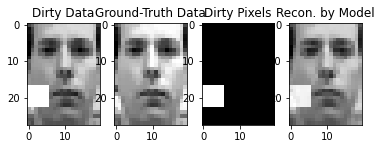

y_noise: 1


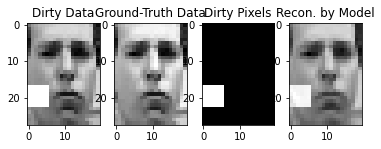

y_noise: 1


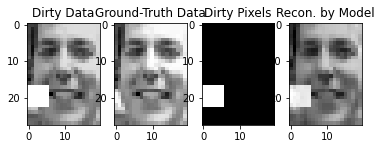

y_noise: 1


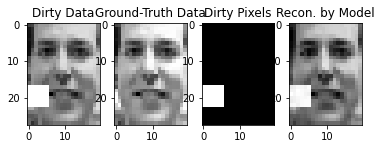

y_noise: 1


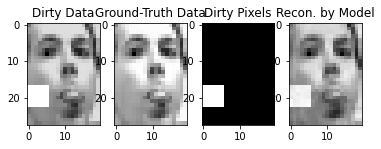

y_noise: 1


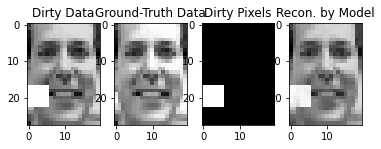

y_noise: 1


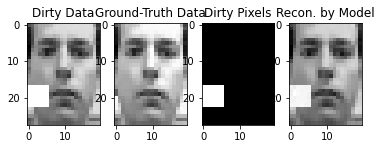

y_noise: 1


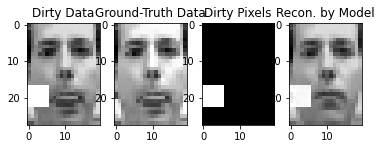

y_noise: 1


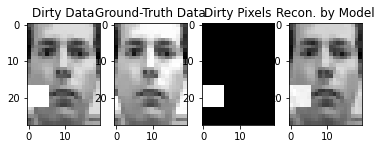

y_noise: 1


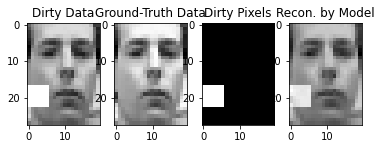

y_noise: 1


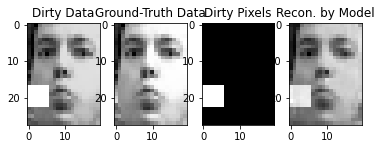

y_noise: 1


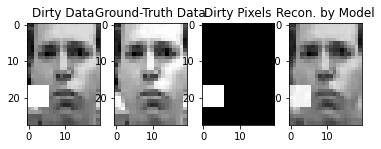

y_noise: 1


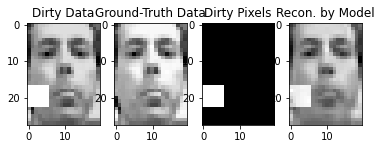

y_noise: 1


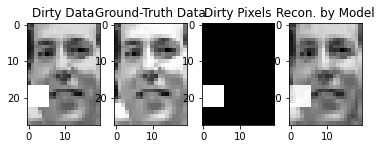

y_noise: 1


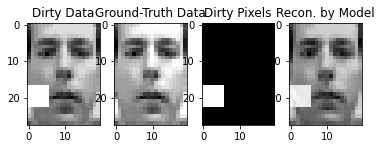

y_noise: 1


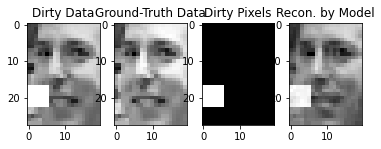

y_noise: 1


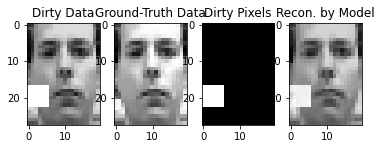

y_noise: 1


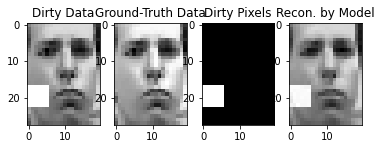

y_noise: 1


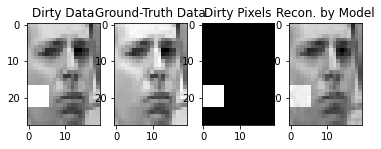

y_noise: 1


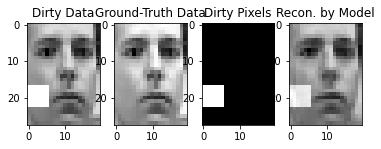

y_noise: 1


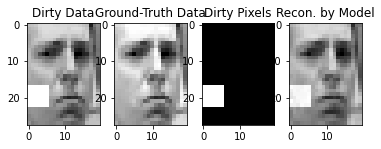

y_noise: 1


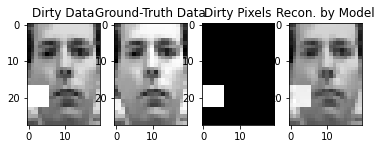

y_noise: 1


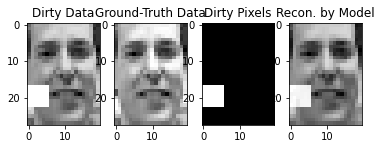

y_noise: 1


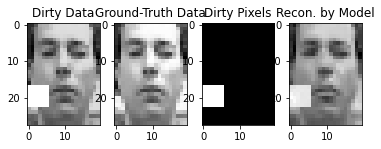

y_noise: 1


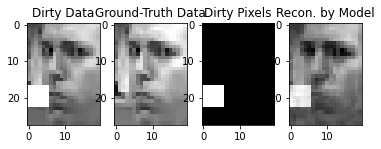

y_noise: 1


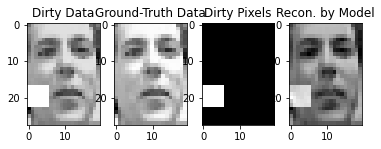

y_noise: 1


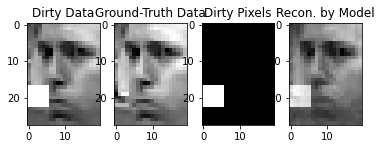

y_noise: 1


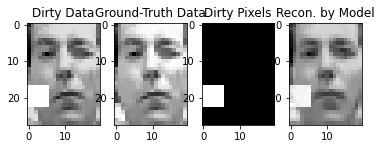

y_noise: 1


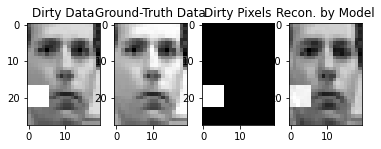

y_noise: 1


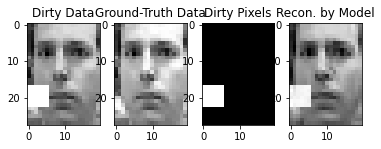

y_noise: 1


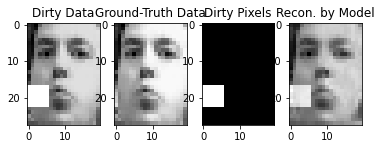

y_noise: 1


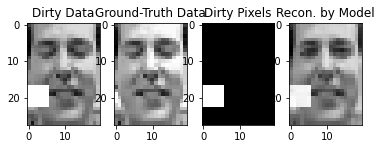

y_noise: 1


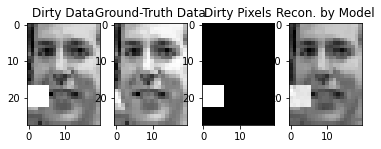

y_noise: 1


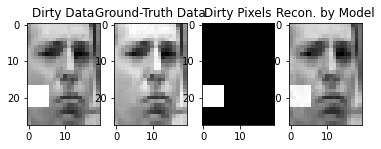

y_noise: 1


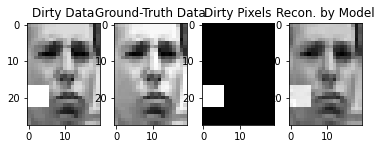

y_noise: 1


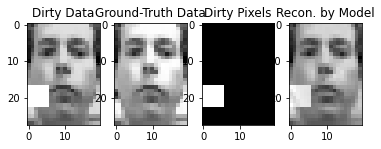

y_noise: 1


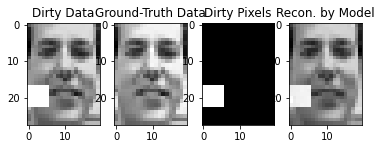

y_noise: 1


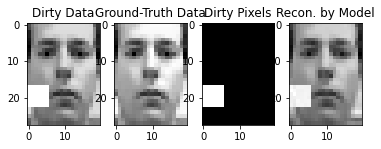

y_noise: 1


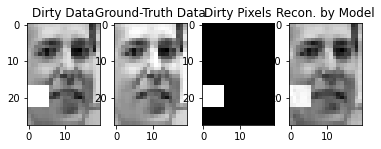

y_noise: 1


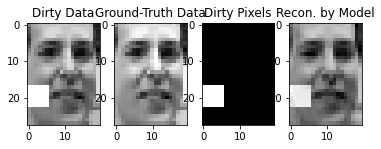

y_noise: 1


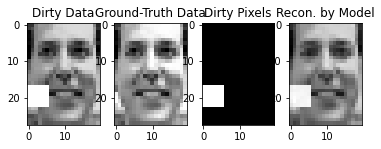

y_noise: 1


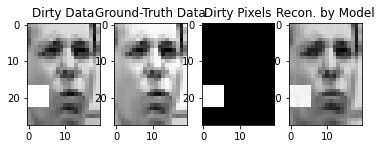

In [40]:
    
for idx in trusted_idxs_train:
    print("y_noise: {}".format(int(y_noise_instance_train[idx])))
    fig, ax = plt.subplots(1,4)
    ax[0].imshow(x_train_orig[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[0].set_title("Dirty Data")
    ax[1].imshow(x_train_clean_orig[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[1].set_title("Ground-Truth Data")
    ax[2].imshow(y_noise_pixels_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[2].set_title("Dirty Pixels")
    ax[3].imshow(recon_imgs_train[idx,...], cmap="gray") # , vmin=0.0, vmax=1.0
    ax[3].imshow(recon_imgs_train[idx,...], cmap="gray")
    ax[3].set_title("Recon. by Model")
    plt.show()


### Show Latent Space

In [41]:
noised_rows = y_noise_instance_train
noised_rows_str = ["Inlier" if not row_val else "Outlier" for row_val in noised_rows]

#### PCA

In [42]:
from sklearn.decomposition import PCA

all_z_train = np.concatenate([z_train_clean,z_train_dirty], axis=0)
pca_2d_z = PCA(n_components=2) # PCA
pca_2d_z.fit(all_z_train)

PCA(n_components=2)

In [43]:
pca_2d_z.explained_variance_

array([6.922492 , 3.9472725], dtype=float32)

In [44]:
z_train_pca2d_clean = pca_2d_z.transform(z_train_clean)
z_train_pca2d_dirty = pca_2d_z.transform(z_train_dirty)

Text(0.5, 1.0, 'Latent Space Z (Projection to 2D): for q(z|x,y=1)')

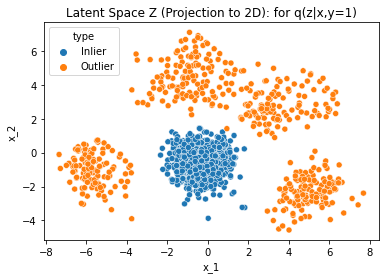

In [45]:
df_plot_z_pca2d_y1 = pd.DataFrame({"x_1": z_train_pca2d_clean[:,0], 
                                   "x_2": z_train_pca2d_clean[:,1], 
                                   "type": noised_rows_str})
sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_pca2d_y1)
plt.title("Latent Space Z (Projection to 2D): for q(z|x,y=1)")

Text(0.5, 1.0, 'Latent Space Z (Projection to 2D): for q(z|x,y=0)')

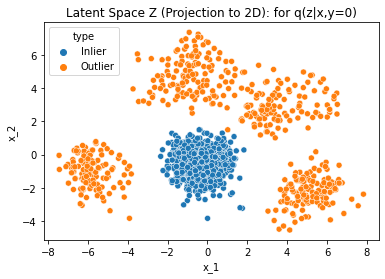

In [46]:
df_plot_z_pca2d_y0 = pd.DataFrame({"x_1": z_train_pca2d_dirty[:,0], 
                                   "x_2": z_train_pca2d_dirty[:,1], 
                                   "type": noised_rows_str})
sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_pca2d_y0)
plt.title("Latent Space Z (Projection to 2D): for q(z|x,y=0)")

### Kernel PCA

In [47]:
from sklearn.decomposition import KernelPCA

kpca_2d_z = KernelPCA(n_components=2, kernel='rbf', degree=5)
kpca_2d_z.fit(all_z_train)

KernelPCA(degree=5, kernel='rbf', n_components=2)

In [48]:
z_train_kpca2d_clean = kpca_2d_z.transform(z_train_clean)
z_train_kpca2d_dirty = kpca_2d_z.transform(z_train_dirty)

Text(0.5, 1.0, 'Latent Space Z (Projection to 2D): for q(z|x,y=1)')

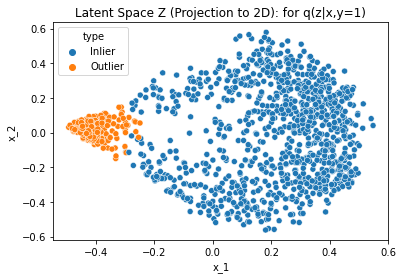

In [49]:
df_plot_z_kpca2d_y1 = pd.DataFrame({"x_1": z_train_kpca2d_clean[:,0], 
                                    "x_2": z_train_kpca2d_clean[:,1], 
                                    "type": noised_rows_str})
sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_kpca2d_y1)
plt.title("Latent Space Z (Projection to 2D): for q(z|x,y=1)")

Text(0.5, 1.0, 'Latent Space Z (Projection to 2D): for q(z|x,y=0)')

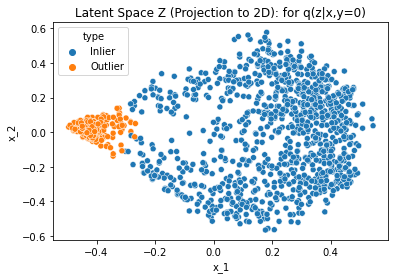

In [50]:
df_plot_z_kpca2d_y0 = pd.DataFrame({"x_1": z_train_kpca2d_dirty[:,0], 
                                    "x_2": z_train_kpca2d_dirty[:,1], 
                                    "type": noised_rows_str})
sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_kpca2d_y0)
plt.title("Latent Space Z (Projection to 2D): for q(z|x,y=0)")

#### T-SNE

In [51]:
from sklearn.manifold import TSNE

In [52]:
tsne_2d_z = TSNE(n_components=2, perplexity=180.0, n_iter=5000)
_z_all_2d = tsne_2d_z.fit_transform(all_z_train)

In [53]:
_len_dataset = z_train_pca2d_clean.shape[0]

z_train_tsne2d_clean = _z_all_2d[:_len_dataset]
z_train_tsne2d_dirty = _z_all_2d[_len_dataset:]

Text(0.5, 1.0, 'Latent Space Z (Projection to 2D): for q(z|x,y=1)')

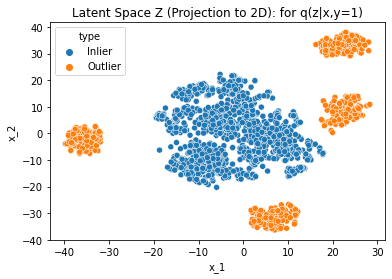

In [54]:
df_plot_z_tsne2d_y1 = pd.DataFrame({"x_1": z_train_tsne2d_clean[:,0], 
                                   "x_2": z_train_tsne2d_clean[:,1], 
                                   "type": noised_rows_str})
sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_tsne2d_y1)
plt.title("Latent Space Z (Projection to 2D): for q(z|x,y=1)")

Text(0.5, 1.0, 'Latent Space Z (Projection to 2D): for q(z|x,y=0)')

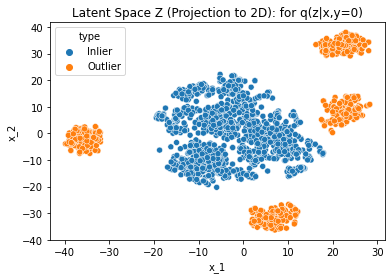

In [55]:
df_plot_z_tsne2d_y0 = pd.DataFrame({"x_1": z_train_tsne2d_dirty[:,0], 
                                   "x_2": z_train_tsne2d_dirty[:,1], 
                                   "type": noised_rows_str})
sns.scatterplot(x="x_1",y="x_2",hue="type",data=df_plot_z_tsne2d_y0)
plt.title("Latent Space Z (Projection to 2D): for q(z|x,y=0)")

### Approx. Log-Likelihood

In [56]:
from repair_syserr_models.loss_utils import log_px_approx_eval

In [57]:
# TODO: insert option for cuda vs. cpu !!
x_inputs = X_train.cuda()
vae_mdl.cuda();


In [58]:
with torch.autograd.profiler.profile(use_cuda=True, profile_memory=True) as prof:

    # log p(x|y) evaluation, for both y=1 and y=0
    elbo_iwae_map = log_px_approx_eval(vae_mdl,
                                       dataset_obj,
                                       x_inputs,
                                       k_samples=250,
                                       y_comps=True,
                                       batch_size=128)

    # to clear GPU Mem -- if used.
    log_px_est_y1 = elbo_iwae_map["y1"].clone().cpu()
    log_px_est_y0 = elbo_iwae_map["y0"].clone().cpu()
    
    del elbo_iwae_map["y1"]
    del elbo_iwae_map["y0"]
    del elbo_iwae_map
    torch.cuda.empty_cache()


Compute Progress: 100%|█████████████████████████████████████████████| 13/13 [00:00<00:00, 26.21it/s]


In [59]:
# print(prof)

In [60]:
arrs_elbo_iwae = np.concatenate([log_px_est_y1,log_px_est_y0,y_noise_instance_train.reshape(-1,1)], axis=1)

df_elbo_iwae = pd.DataFrame(arrs_elbo_iwae, columns=["log_px_y1", "log_px_y0", "noise_label"])
df_elbo_iwae["noise_label"] = df_elbo_iwae["noise_label"].apply(lambda x: "dirty" if x==1 else "clean")

In [61]:
df_elbo_iwae

log_px_y1   log_px_y0 noise_label
0     575.914795  556.862488       clean
1     661.996887  644.237122       clean
2     742.625916  799.981873       dirty
3     712.187317  766.774597       dirty
4     489.890106  480.234772       clean
...          ...         ...         ...
1567  795.678833  770.006836       clean
1568  687.239990  667.962463       clean
1569  443.545685  482.064026       dirty
1570  748.247009  723.886475       clean
1571  585.779175  660.522827       dirty

[1572 rows x 3 columns]

In [62]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)
    

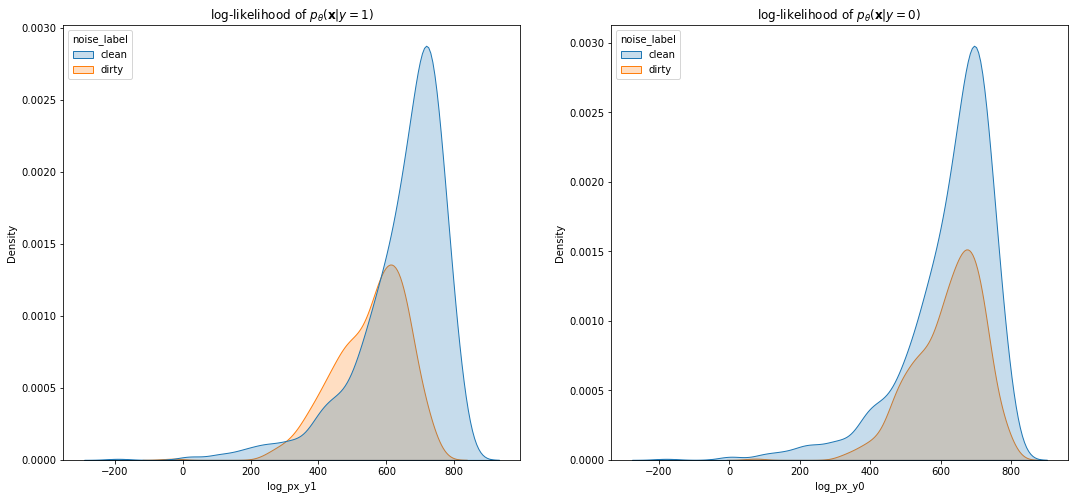

In [63]:
fig, axes = plt.subplots(1,2, figsize=(18,8))

sns.kdeplot(ax=axes[0], data=df_elbo_iwae, x="log_px_y1", hue="noise_label", fill=True, legend=True)

axes[0].set_title("log-likelihood of $p_{\\theta}(\mathbf{x}|y=1)$")
move_legend(axes[0], "upper left")


sns.kdeplot(ax=axes[1], data=df_elbo_iwae, x="log_px_y0", hue="noise_label", fill=True, legend=True)

axes[1].set_title("log-likelihood of $p_{\\theta}(\mathbf{x}|y=0)$")
move_legend(axes[1], "upper left")


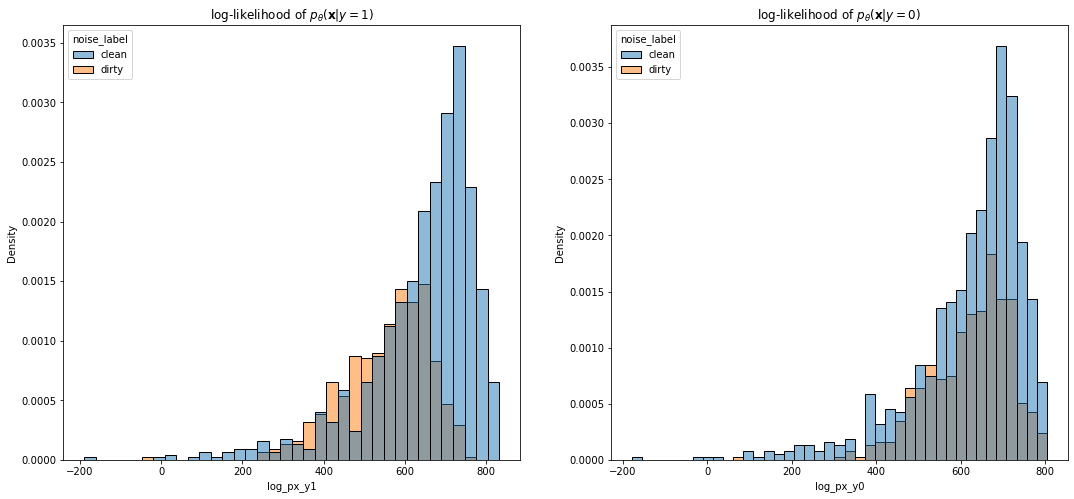

In [64]:
fig, axes = plt.subplots(1,2, figsize=(18,8))

sns.histplot(ax=axes[0], data=df_elbo_iwae, x="log_px_y1", hue="noise_label", legend=True, stat="density")
axes[0].set_title("log-likelihood of $p_{\\theta}(\mathbf{x}|y=1)$")
move_legend(axes[0], "upper left")

sns.histplot(ax=axes[1], data=df_elbo_iwae, x="log_px_y0", hue="noise_label", legend=True, stat="density")
axes[1].set_title("log-likelihood of $p_{\\theta}(\mathbf{x}|y=0)$")
move_legend(axes[1], "upper left")


In [65]:
def epdf(xs, bins):
    xmin, xmax = np.inf, -np.inf
    for xi in xs:
        xmin = min(xmin, np.nanmin(xi))
        xmax = max(xmax, np.nanmax(xi))
    bin_range = (xmin, xmax)
    bins = np.lib.histograms.histogram_bin_edges(np.concatenate(xs), bins, bin_range)
    tops = []
    for xi in xs:
        m, _ = np.histogram(xi, bins, density=True)
        tops.append(m.astype(float))
    return tops, bins


In [66]:
tops, bin_edges = epdf([log_px_est_y1.numpy().flatten()[~y_noise_instance_train], log_px_est_y1.numpy().flatten()[y_noise_instance_train]], 25)
top_model, top_data = tops[0], tops[1]

In [67]:
np.sum(np.abs(top_model - top_data))

0.022560897008702625

In [68]:
def histogram_intersection(h1, h2, bins):
    bins = np.diff(bins)
    sm = 0
    for i in range(len(bins)):
        sm += min(bins[i]*h1[i], bins[i]*h2[i])
    return sm

In [69]:
histogram_intersection(tops[0], tops[1], bin_edges)

0.5393041934576